<a href="https://colab.research.google.com/github/berniwal/CIL_Project/blob/master/Albert2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Go to correct directory

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.getcwd()
os.chdir('/content/drive/My Drive/CIL')
os.getcwd()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


'/content/drive/My Drive/CIL'

## install + import libraries

In [2]:
!pip install params_flow==0.7.1
!pip install py-params==0.7.3
!pip install sentencepiece
import sentencepiece as spm
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import os
from datetime import datetime

import bert
#different Tokenizer for Albert
from bert.tokenization.bert_tokenization import FullTokenizer
from bert.tokenization.albert_tokenization import AlbertFullTokenizer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
from bert import BertModelLayer
import sentencepiece as spm

from tqdm import tqdm
import numpy as np

from sklearn.utils import shuffle

  Created wheel for params-flow: filename=params_flow-0.7.1-cp36-none-any.whl size=15376 sha256=dc754b0105a7c972a5b09734fb5845c213d30937e27d80e89221103dd2feed27
  Stored in directory: /root/.cache/pip/wheels/e2/7b/2a/b411aaa219132a68b17937fc9431fd9eb9c23c12a7df3d134f
  Created wheel for py-params: filename=py_params-0.9.7-cp36-none-any.whl size=7302 sha256=e499a71b452cacac3ebafafa816c57d279071be3242560f05f9e1f115433a365
  Stored in directory: /root/.cache/pip/wheels/67/f5/19/b461849a50aefdf4bab47c4756596e82ee2118b8278e5a1980
Successfully built params-flow py-params
  Created wheel for py-params: filename=py_params-0.7.3-cp36-none-any.whl size=4346 sha256=5dbe2980914e3642c6672e9eac544e89cfc274f2133943734c902e890413bd5a
  Stored in directory: /root/.cache/pip/wheels/a3/9f/a1/e7e79bd92eecef952a46b16d0bc93ffdc91d4b619f79777d27
Successfully built py-params
  Found existing installation: py-params 0.9.7
    Uninstalling py-params-0.9.7:
      Successfully uninstalled py-params-0.9.7
     |██

INFO:tensorflow:Initializing the TPU system: grpc://10.115.11.58:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


## Fix Directories for BERT
First part of selecting which model

In [3]:
# 'bert' or 'bert_large' or 'albert'
MODEL = 'albert'
ADDITIONAL_DATA = False
identifier='Second_XLARGE' # for naming the output csv, weights and validation scores for graph

# '' or '_monoise' or '_monoise_b'
DATASET_PREPROCESSING = '' 

#Learning parameters
epochs = 4
last_val_loss = None
patience = 5
no_improvement_since = 0
current_learning_rate = 1e-4
minimum_learning_rate = 1e-7
reload_training = False
reload_checkpoint = './twitter_bert_large_second.h5'

CHECKPOINT = None
CHECKPOINT_CKPT = None
CHECKPOINT_VOCAB = None
CHECKPOINT_CONFIG = None

if MODEL == 'bert':
  CHECKPOINT = './bert/checkpoints/bert_base'
if MODEL == 'bert_large':
  CHECKPOINT = './bert/checkpoints/bert_large_wwm'
if MODEL == 'albert':
  CHECKPOINT = './bert/checkpoints/albert_xlarge'

if MODEL == 'bert' or MODEL == 'bert_large':
  CHECKPOINT_CKPT = os.path.join(CHECKPOINT, 'bert_model.ckpt')
  CHECKPOINT_VOCAB = os.path.join(CHECKPOINT, 'vocab.txt')
  CHECKPOINT_CONFIG = os.path.join(CHECKPOINT, 'bert_config.json')
if MODEL == 'albert':
  CHECKPOINT_VOCAB = os.path.join(CHECKPOINT, '30k-clean.model')
  CHECKPOINT_CKPT = os.path.join(CHECKPOINT, 'model.ckpt-best')
  CHECKPOINT_CONFIG = os.path.join(CHECKPOINT, 'albert_config.json')

DATASET_DIR = './'
DATASET_FILE_TRAIN_NEG = os.path.join(DATASET_DIR, 'twitter-datasets/train_neg_full{}.txt'.format(DATASET_PREPROCESSING))
DATASET_FILE_TRAIN_POS = os.path.join(DATASET_DIR, 'twitter-datasets/train_pos_full{}.txt'.format(DATASET_PREPROCESSING))
DATASET_FILE_TEST = os.path.join(DATASET_DIR, 'twitter-datasets/test_data{}.txt'.format(DATASET_PREPROCESSING))

DATASET_FILE_NEG_EXTRA = os.path.join(DATASET_DIR, 'twitter-datasets/extra_neg{}.txt'.format(DATASET_PREPROCESSING))
DATASET_FILE_POS_EXTRA = os.path.join(DATASET_DIR, 'twitter-datasets/extra_pos{}.txt'.format(DATASET_PREPROCESSING))

FILE_PATHS = [DATASET_FILE_TRAIN_POS, DATASET_FILE_TRAIN_NEG]

steps = None
if ADDITIONAL_DATA:
  steps = 336
else:
  steps = 200

## methods to create BERT layer
change name="albert" for other model, have to adjust paths above too

In [4]:
def flatten_layers(root_layer):
    if isinstance(root_layer, keras.layers.Layer):
        yield root_layer
    for layer in root_layer._layers:
        for sub_layer in flatten_layers(layer):
            yield sub_layer


def freeze_bert_layers(l_bert):
    """
    Freezes all but LayerNorm and adapter layers - see arXiv:1902.00751.
    """
    for layer in flatten_layers(l_bert):
        if layer.name in ["LayerNorm", "adapter-down", "adapter-up"]:
            layer.trainable = True
        elif len(layer._layers) == 0:
            layer.trainable = False
        l_bert.embeddings_layer.trainable = False


def create_learning_rate(learn_rate=5e-5):

    def lr_scheduler(epoch):
        return float(learn_rate)
    learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)

    return learning_rate_scheduler

def create_learning_rate_scheduler(max_learn_rate=5e-5,
                                   end_learn_rate=1e-7,
                                   warmup_epoch_count=10,
                                   total_epoch_count=90):

    def lr_scheduler(epoch):
        if epoch < warmup_epoch_count:
            #res = (max_learn_rate/warmup_epoch_count) * (epoch + 1)
            res = end_learn_rate
        else:
            res = max_learn_rate*math.exp(math.log(end_learn_rate/max_learn_rate)*(epoch-warmup_epoch_count+1)/(total_epoch_count-warmup_epoch_count+1))
        return float(res)
    learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)

    return learning_rate_scheduler


def create_model(max_seq_len, adapter_size=64):
    """Creates a classification model."""

    # adapter_size = 64  # see - arXiv:1902.00751

    # create the bert layer
    with tf.io.gfile.GFile(CHECKPOINT_CONFIG, "r") as reader:
        #Download from Google
        #model_dir    = bert.fetch_tfhub_albert_model(model_name, ".models")
        #bert_params = bert.albert_params(model_name)
        #bert_l = BertModelLayer.from_params(bert_params, name="albert", shared_layer=True, embedding_size=128)
        
        bc = StockBertConfig.from_json_string(reader.read())
        bert_params = map_stock_config_to_params(bc)
        bert_params.adapter_size = adapter_size
        bert_l = None
        if MODEL[:4] == 'bert':
          bert_l = BertModelLayer.from_params(bert_params, name="bert")
        else:
          bert_l = BertModelLayer.from_params(bert_params, name="albert", shared_layer=True, embedding_size=128)

    input_ids = keras.layers.Input(shape=(max_seq_len,), dtype='int32', name="input_ids")
    # token_type_ids = keras.layers.Input(shape=(max_seq_len,), dtype='int32', name="token_type_ids")
    # output         = bert([input_ids, token_type_ids])
    output = bert_l(input_ids)

    print("bert shape", output.shape)
    cls_out = keras.layers.Lambda(lambda seq: seq[:, 0, :])(output)
    cls_out = keras.layers.Dropout(0.5)(cls_out)
    logits = keras.layers.Dense(units=768, activation="tanh")(cls_out)
    logits = keras.layers.Dropout(0.5)(logits)
    logits = keras.layers.Dense(units=2, activation="softmax")(logits)

    # model = keras.Model(inputs=[input_ids, token_type_ids], outputs=logits)
    # model.build(input_shape=[(None, max_seq_len), (None, max_seq_len)])
    model = keras.Model(inputs=input_ids, outputs=logits)
    model.build(input_shape=(None, max_seq_len))

    # load the pre-trained model weights
    if MODEL[:4] == 'bert':
      load_stock_weights(bert_l, CHECKPOINT_CKPT)
    else:
      bert.load_albert_weights(bert_l, CHECKPOINT_CKPT)

    # freeze weights if adapter-BERT is used
    if adapter_size is not None:
        freeze_bert_layers(bert_l)

    model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")])

    return model

# Define Dataloading Class
Also loading data into array


In [5]:
import logging
logging.getLogger("tensorflow").setLevel(logging.WARNING)

def load_data(file_path):
    data = {}
    data["sentence"] = []
    with open(file_path, "r") as f:
        data["sentence"] = f.readlines()

    #longest_string = max(data["sentence"], key=len)
    #print(longest_string)
    #print(len(longest_string))

    return pd.DataFrame.from_dict(data)

def load_dataset(pos_directory, neg_directory):
    pos_df = load_data(pos_directory)
    neg_df = load_data(neg_directory)

    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0

    return pd.concat([pos_df, neg_df])

class MovieReviewData:
    DATA_COLUMN = "sentence"
    LABEL_COLUMN = "sentiment"

    def __init__(self, tokenizer= FullTokenizer, max_seq_len=128, steps=200, extra_data=False):
        self.tokenizer = tokenizer
        self.step = None
        self.sample_size= 128*937
        self.max_seq_len = max_seq_len
        self.train_x = None
        self.train_x_token_types = None
        self.test_x = None
        self.test_x_token_types = None
        self.train_y = None
        self.test_y = None
        self.steps = steps
        self.extra_data = extra_data
        
    def _prepare(self, df):
        x, y = [], []
        with tqdm(total=df.shape[0], unit_scale=True) as pbar:
            for ndx, row in df.iterrows():
                text, label = row[MovieReviewData.DATA_COLUMN], row[MovieReviewData.LABEL_COLUMN]
                tokens = self.tokenizer.tokenize(text)
                tokens = ["[CLS]"] + tokens + ["[SEP]"]
                token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
                # self.max_seq_len = max(self.max_seq_len, len(token_ids))
                x.append(token_ids)
                y.append(int(label))
                pbar.update()
        return np.array(x), np.array(y)

    def _pad(self, ids):
        x, t = [], []
        token_type_ids = [0] * self.max_seq_len
        for input_ids in ids:
            input_ids = input_ids[:min(len(input_ids), self.max_seq_len - 2)]
            input_ids = input_ids + [0] * (self.max_seq_len - len(input_ids))
            x.append(np.array(input_ids))
            t.append(token_type_ids)
        return np.array(x), np.array(t)

    def load_data(self, step, update_test=True):
        trainset = load_dataset(DATASET_FILE_TRAIN_POS, DATASET_FILE_TRAIN_NEG)

        step = step % self.steps

        trainset = shuffle(trainset, random_state=5)
        #remove already processed data
        train = trainset.head(2400000)

        if self.extra_data:
          trainset_extra = load_dataset(DATASET_FILE_POS_EXTRA, DATASET_FILE_NEG_EXTRA)
          trainset_extra = shuffle(trainset_extra, random_state=5)
          train = pd.concat([train, trainset_extra], ignore_index=True)
        
        train = train.head(self.steps*128*93)
        train = train.tail(self.steps*128*93 - step*128*93)
        train = train.head(128*93)
        test = trainset.tail(100000)
        #train = trainset.head(10*128)
        #test = trainset.tail(10*128)

        train = shuffle(train)
        test = shuffle(test)

        train.reset_index(inplace=True, drop=True)
        test.reset_index(inplace=True, drop=True)

        if update_test:
          ((self.train_x, self.train_y),
          (self.test_x, self.test_y)) = map(self._prepare, [train, test])

          ((self.train_x, self.train_x_token_types),
          (self.test_x, self.test_x_token_types)) = map(self._pad,
                                                        [self.train_x, self.test_x])
        else:
          df_empty = pd.DataFrame({'empty' : []})
          ((self.train_x, self.train_y),
          (_, _)) = map(self._prepare, [train, df_empty])

          ((self.train_x, self.train_x_token_types),
          (_, _)) = map(self._pad, [self.train_x, []])

spm_model = None
sp = None

if MODEL == 'albert':
  spm_model = os.path.join('./bert/checkpoints/albert_xlarge/', "30k-clean.model")
  sp = spm.SentencePieceProcessor()
  sp.load(spm_model)

tokenizer = None
if MODEL[:4] == 'bert':
  tokenizer = FullTokenizer(vocab_file=CHECKPOINT_VOCAB, do_lower_case=True)
else:
  tokenizer = AlbertFullTokenizer(vocab_file=None, do_lower_case=True, spm_model_file=CHECKPOINT_VOCAB)

## BERT text preprocessing

In [6]:
def pre_process_positive(x, max_seq_len):
  tokens = tokenizer.tokenize(x.numpy())
  tokens = ["[CLS]"] + tokens + ["[SEP]"]
  token_ids = tokenizer.convert_tokens_to_ids(tokens)
  token_ids = token_ids[:min(len(token_ids), max_seq_len - 2)]
  token_ids = np.concatenate((token_ids, np.zeros((max_seq_len - len(token_ids))))).astype(np.int32)
  return token_ids, int(1)

def pre_process_negative(x, max_seq_len):
  tokens = tokenizer.tokenize(x.numpy())
  tokens = ["[CLS]"] + tokens + ["[SEP]"]
  token_ids = tokenizer.convert_tokens_to_ids(tokens)
  token_ids = token_ids[:min(len(token_ids), max_seq_len - 2)]
  token_ids = np.concatenate((token_ids, np.zeros((max_seq_len - len(token_ids))))).astype(np.int32)
  return token_ids, int(0)

def pre_process_text(x):
  tokens = tokenizer.tokenize(x.numpy())
  tokens = ["[CLS]"] + tokens + ["[SEP]"]
  return tokens

def dummy_pre_process(x):
   return tf.constant(3, shape=(128,))

## Build Model

In [7]:
max_seq_len = 128
adapter_size = None

with tpu_strategy.scope():
    model = create_model(max_seq_len, adapter_size=adapter_size)

model.summary()

total_epoch_count = 1

bert shape (None, 128, 2048)
Loading google-research/ALBERT weights...
Done loading 22 BERT weights from: ./bert/checkpoints/albert_xlarge/model.ckpt-best into <bert.model.BertModelLayer object at 0x7f35d31c9a58> (prefix:albert). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from checkpoint: 
	bert/embeddings/token_type_embeddings
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
	cls/seq_relationship/output_bias
	cls/seq_relationship/output_weights
	global_step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 128)]             0         
____________________________________________________________


## Train model/fit+save weights

In [8]:
data = MovieReviewData(tokenizer, max_seq_len=128, steps=steps, extra_data=ADDITIONAL_DATA)

val_losses = []
val_accuracy = []
train_losses = []
train_accuracy = []

if reload_training:
  model.load_weights(reload_checkpoint) 

finished_learning = False
update_test = True
for epoch in range(epochs):
  for step in range(steps):
    print('Epoch {}/{} Step {}/{}'.format(epoch, epochs-1, step, steps-1))
    print('Loading Data...')
    data.load_data(step, update_test)
    print(str(data.train_x))
    if update_test:
      update_test = False

    dataset_train = tf.data.Dataset.from_tensor_slices((data.train_x, data.train_y))
    dataset_train = dataset_train.batch(32, drop_remainder=True)

    dataset_test = tf.data.Dataset.from_tensor_slices((data.test_x, data.test_y))
    dataset_test = dataset_test.batch(32, drop_remainder=True)

    train_history = model.fit(dataset_train,
                    epochs=1,
                    callbacks=[create_learning_rate(learn_rate=current_learning_rate)])
    
    loss = train_history.history['loss'][0]
    accuracy = train_history.history['acc'][0]

    train_losses.append(loss)
    train_accuracy.append(accuracy)

    if step % 10 == 0:
      print('Run Validation...')
      results = model.evaluate(dataset_test)
      val_loss = results[0]
      val_acc = results[1]
      val_losses.append(val_loss)
      val_accuracy.append(val_acc)

      if last_val_loss is None or last_val_loss > val_loss:
        last_val_loss = val_loss
        no_improvement_since = 0
      else:
        no_improvement_since += 1
        if no_improvement_since >= patience:
          current_learning_rate = current_learning_rate * 0.1
          if current_learning_rate < minimum_learning_rate:
            print('Learning Finished Early')
            finished_learning = True
            break
          print('Decreasing Learning Rate to: {}'.format(current_learning_rate))
          no_improvement_since = 0
        else:
          print('No improvement since: {}'.format(no_improvement_since))


    if step != 0 and step % 100 == 0:
      model.save_weights('./'+MODEL+identifier+'_epoch_{}_step_{}.h5'.format(epoch, step), overwrite=True)

  model.save_weights('./'+MODEL+identifier+'_epoch_{}.h5'.format(epoch), overwrite=True)
  
  # Write Results Intermediate
  if not os.path.exists('./results'):
    os.mkdir('./results')

  f = open('./results/'+MODEL+identifier+'_epoch_{}_train.txt'.format(epoch), 'w')
  for x in range(len(train_losses)):
    f.write('{} {} {}\n'.format(x, train_losses[x], train_accuracy[x]))
  f.close()

  f = open('./results/'+MODEL+identifier+'_epoch_{}_validation.txt'.format(epoch), 'w')
  for x in range(len(val_losses)):
    f.write('{} {} {}\n'.format(x * 100, val_losses[x], val_accuracy[x]))
  f.close()

  if finished_learning: 
    break

model.save_weights('./'+MODEL+identifier+'.h5', overwrite=True)

# Write Results
if not os.path.exists('./results'):
  os.mkdir('./results')

f = open('./results/'+MODEL+identifier+'_train.txt', 'w')
for x in range(len(train_losses)):
  f.write('{} {} {}\n'.format(x, train_losses[x], train_accuracy[x]))
f.close()

f = open('./results/'+MODEL+identifier+'_validation.txt', 'w')
for x in range(len(val_losses)):
  f.write('{} {} {}\n'.format(x * 100, val_losses[x], val_accuracy[x]))
f.close()

Epoch 0/3 Step 0/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:04<00:00, 2.54kit/s]
100%|██████████| 100k/100k [00:25<00:00, 3.87kit/s] 


[[    2 12649  4393 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2   751 16236 ...     0     0     0]
 [    2  1458   994 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 231ms/step - loss: 0.7448 - acc: 0.5024 - lr: 1.0000e-04
Run Validation...
3125/3125 [==============================] - 240s 77ms/step - loss: 0.8048 - acc: 0.5000
Epoch 0/3 Step 1/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.36kit/s]
0.00it [00:00, ?it/s]


[[    2   330   268 ...     0     0     0]
 [    2    13  5256 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2 16683    26 ...     0     0     0]
 [    2    90    89 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 231ms/step - loss: 0.7436 - acc: 0.4977 - lr: 1.0000e-04
Epoch 0/3 Step 2/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.83kit/s]
0.00it [00:00, ?it/s]


[[    2  6082  2274 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    86   328 ...     0     0     0]
 ...
 [    2   483    25 ...     0     0     0]
 [    2 10226  5243 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.7129 - acc: 0.5031 - lr: 1.0000e-04
Epoch 0/3 Step 3/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.35kit/s]
0.00it [00:00, ?it/s]


[[  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2 722  13 ...   0   0   0]
 ...
 [  2  13   1 ...   0   0   0]
 [  2  86  72 ...   0   0   0]
 [  2  13   1 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 233ms/step - loss: 0.7061 - acc: 0.5000 - lr: 1.0000e-04
Epoch 0/3 Step 4/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.21kit/s]
0.00it [00:00, ?it/s]


[[    2    31   114 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  5591    69 ...     0     0     0]
 ...
 [    2    31    57 ...     0     0     0]
 [    2 10761  8884 ...     0     0     0]
 [    2    31    83 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 231ms/step - loss: 0.7025 - acc: 0.4953 - lr: 1.0000e-04
Epoch 0/3 Step 5/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.34kit/s]
0.00it [00:00, ?it/s]


[[  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  41  40 ...   0   0   0]
 ...
 [  2  13   1 ...   0   0   0]
 [  2  14  13 ...   0   0   0]
 [  2  42 259 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 231ms/step - loss: 0.7011 - acc: 0.4908 - lr: 1.0000e-04
Epoch 0/3 Step 6/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.35kit/s]
0.00it [00:00, ?it/s]


[[   2   51 1573 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   48   25 ...    0    0    0]
 ...
 [   2   13 5256 ...    0    0    0]
 [   2   31  164 ...    0    0    0]
 [   2   13    7 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6998 - acc: 0.5060 - lr: 1.0000e-04
Epoch 0/3 Step 7/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.23kit/s]
0.00it [00:00, ?it/s]


[[    2   259    20 ...     0     0     0]
 [    2 25429    14 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    32   361 ...     0     0     0]
 [    2   683   930 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 231ms/step - loss: 0.7005 - acc: 0.5016 - lr: 1.0000e-04
Epoch 0/3 Step 8/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.41kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2   452    20 ...     0     0     0]
 [    2    55    29 ...     0     0     0]
 ...
 [    2  6926 19184 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    98    22 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.7001 - acc: 0.4984 - lr: 1.0000e-04
Epoch 0/3 Step 9/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.45kit/s]
0.00it [00:00, ?it/s]


[[   2 4505   35 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6987 - acc: 0.5046 - lr: 1.0000e-04
Epoch 0/3 Step 10/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.34kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  483 9979 ...    0    0    0]
 ...
 [   2   31 3223 ...    0    0    0]
 [   2 4455   19 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6984 - acc: 0.5024 - lr: 1.0000e-04
Run Validation...
3125/3125 [==============================] - 241s 77ms/step - loss: 0.6938 - acc: 0.5000
Epoch 0/3 Step 11/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.13kit/s]
0.00it [00:00, ?it/s]


[[    2   184    20 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2  8613   240 ...     0     0     0]
 [    2 18066  1544 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6970 - acc: 0.5071 - lr: 1.0000e-04
Epoch 0/3 Step 12/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.76kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2 18593   400 ...     0     0     0]
 [    2  1402 21078 ...     0     0     0]
 ...
 [    2    13  5256 ...     0     0     0]
 [    2    31   221 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6992 - acc: 0.4997 - lr: 1.0000e-04
Epoch 0/3 Step 13/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.29kit/s]
0.00it [00:00, ?it/s]


[[    2 11468     8 ...     0     0     0]
 [    2    31  1518 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    51   204 ...     0     0     0]
 [    2    31    92 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6989 - acc: 0.4966 - lr: 1.0000e-04
Epoch 0/3 Step 14/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.19kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   42 2973 ...    0    0    0]
 [   2 6926   62 ...    0    0    0]
 ...
 [   2 1017  567 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 2631   70 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6991 - acc: 0.4924 - lr: 1.0000e-04
Epoch 0/3 Step 15/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.37kit/s]
0.00it [00:00, ?it/s]


[[    2    13  5491 ...     0     0     0]
 [    2    13  5256 ...     0     0     0]
 [    2    31  2933 ...     0     0     0]
 ...
 [    2    31    23 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13 14396 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6972 - acc: 0.5014 - lr: 1.0000e-04
Epoch 0/3 Step 16/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.34kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   90   85 ...    0    0    0]
 [   2   14 6926 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    8 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6966 - acc: 0.5024 - lr: 1.0000e-04
Epoch 0/3 Step 17/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.27kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2 21096  4117 ...     0     0     0]
 [    2  8903    25 ...     0     0     0]
 ...
 [    2 10014    25 ...     0     0     0]
 [    2    90 14259 ...     0     0     0]
 [    2 23333    17 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 233ms/step - loss: 0.6978 - acc: 0.4975 - lr: 1.0000e-04
Epoch 0/3 Step 18/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.57kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13 1897 ...    0    0    0]
 [   2   13 4269 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6982 - acc: 0.5052 - lr: 1.0000e-04
Epoch 0/3 Step 19/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.06kit/s]
0.00it [00:00, ?it/s]


[[   2  228   20 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 1700 4455 ...    0    0    0]
 ...
 [   2 1094 5478 ...    0    0    0]
 [   2  699   26 ...    0    0    0]
 [   2  130   31 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6977 - acc: 0.4920 - lr: 1.0000e-04
Epoch 0/3 Step 20/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.23kit/s]
0.00it [00:00, ?it/s]


[[    2  1276   259 ...     0     0     0]
 [    2   158   551 ...     0     0     0]
 [    2  2098 20577 ...     0     0     0]
 ...
 [    2    13  5256 ...     0     0     0]
 [    2   797  7385 ...     0     0     0]
 [    2 13587  9008 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6955 - acc: 0.5064 - lr: 1.0000e-04
Run Validation...
3125/3125 [==============================] - 241s 77ms/step - loss: 0.6934 - acc: 0.5000
Epoch 0/3 Step 21/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.21kit/s]
0.00it [00:00, ?it/s]


[[    2 18254 17222 ...     0     0     0]
 [    2    31   510 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2  4310   211 ...     0     0     0]
 [    2   448    20 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6967 - acc: 0.5018 - lr: 1.0000e-04
Epoch 0/3 Step 22/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.87kit/s]
0.00it [00:00, ?it/s]


[[   2  483  491 ...    0    0    0]
 [   2   31  589 ...    0    0    0]
 [   2 1131   20 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6968 - acc: 0.4949 - lr: 1.0000e-04
Epoch 0/3 Step 23/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.22kit/s]
0.00it [00:00, ?it/s]


[[  2  51 194 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 ...
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6977 - acc: 0.4936 - lr: 1.0000e-04
Epoch 0/3 Step 24/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.17kit/s]
0.00it [00:00, ?it/s]


[[   2  580 3531 ...    0    0    0]
 [   2 1458  994 ...    0    0    0]
 [   2 2943 3222 ...    0    0    0]
 ...
 [   2 5575   13 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6978 - acc: 0.4986 - lr: 1.0000e-04
Epoch 0/3 Step 25/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.60kit/s]
0.00it [00:00, ?it/s]


[[   2 2247 2018 ...    0    0    0]
 [   2 6926  245 ...    0    0    0]
 [   2 1700 3917 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 1019  716 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6975 - acc: 0.5018 - lr: 1.0000e-04
Epoch 0/3 Step 26/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.27kit/s]
0.00it [00:00, ?it/s]


[[   2   53   16 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 8009 7270 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6959 - acc: 0.5004 - lr: 1.0000e-04
Epoch 0/3 Step 27/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.24kit/s]
0.00it [00:00, ?it/s]


[[    2  7888  2247 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  6926 20131 ...     0     0     0]
 ...
 [    2  4446   111 ...     0     0     0]
 [    2    31    23 ...     0     0     0]
 [    2  1962 10681 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6955 - acc: 0.5001 - lr: 1.0000e-04
Epoch 0/3 Step 28/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.22kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2  747  130 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    7 ...    0    0    0]
 [   2  174 5066 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6970 - acc: 0.4916 - lr: 1.0000e-04
Epoch 0/3 Step 29/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.09kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   51 2330 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   90   32 ...    0    0    0]
 [   2   21  491 ...    0    0    0]
 [   2  249   14 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6960 - acc: 0.4996 - lr: 1.0000e-04
Epoch 0/3 Step 30/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.29kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2  1962 10623 ...     0     0     0]
 [    2    35   639 ...     0     0     0]
 ...
 [    2  9214 15521 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6951 - acc: 0.5003 - lr: 1.0000e-04
Run Validation...
3125/3125 [==============================] - 242s 77ms/step - loss: 0.6935 - acc: 0.5000
No improvement since: 1
Epoch 0/3 Step 31/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.19kit/s]
0.00it [00:00, ?it/s]


[[    2   483    31 ...     0     0     0]
 [    2 13744 15586 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    51  6926 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    31 11024 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6956 - acc: 0.4985 - lr: 1.0000e-04
Epoch 0/3 Step 32/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.16kit/s]
0.00it [00:00, ?it/s]


[[    2   130    21 ...     0     0     0]
 [    2 12788    27 ...     0     0     0]
 [    2  4555 11668 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2   408    22 ...     0     0     0]
 [    2   695    13 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6944 - acc: 0.5018 - lr: 1.0000e-04
Epoch 0/3 Step 33/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:04<00:00, 2.41kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2 3223 5725 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2 2236 4572 ...    0    0    0]
 [   2  253  212 ...    0    0    0]
 [   2 2155   78 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 234ms/step - loss: 0.6953 - acc: 0.4992 - lr: 1.0000e-04
Epoch 0/3 Step 34/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:05<00:00, 2.09kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   31   57 ...    0    0    0]
 [   2   31 2973 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13 2984 ...    0    0    0]
 [   2   31 2536 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6944 - acc: 0.5059 - lr: 1.0000e-04
Epoch 0/3 Step 35/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.03kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2 15293    13 ...     0     0     0]
 [    2    51  4455 ...     0     0     0]
 ...
 [    2    13  3885 ...     0     0     0]
 [    2    31  3238 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6949 - acc: 0.4970 - lr: 1.0000e-04
Epoch 0/3 Step 36/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.33kit/s]
0.00it [00:00, ?it/s]


[[   2   31  376 ...    0    0    0]
 [   2 5243  378 ...    0    0    0]
 [   2   86 2600 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   80  129 ...    0    0    0]
 [   2   31  277 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6944 - acc: 0.5008 - lr: 1.0000e-04
Epoch 0/3 Step 37/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.33kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  189  171 ...    0    0    0]
 ...
 [   2 5752  148 ...    0    0    0]
 [   2   13 1307 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6947 - acc: 0.5018 - lr: 1.0000e-04
Epoch 0/3 Step 38/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.14kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2   332   396 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    31 12185 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6948 - acc: 0.4970 - lr: 1.0000e-04
Epoch 0/3 Step 39/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.30kit/s]
0.00it [00:00, ?it/s]


[[  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 ...
 [  2  55 266 ...   0   0   0]
 [  2  31  22 ...   0   0   0]
 [  2  13   1 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6952 - acc: 0.4929 - lr: 1.0000e-04
Epoch 0/3 Step 40/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.29kit/s]
0.00it [00:00, ?it/s]


[[    2    13     9 ...     0     0     0]
 [    2  2536   737 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2 18254    20 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    31   114 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6950 - acc: 0.4912 - lr: 1.0000e-04
Run Validation...
3125/3125 [==============================] - 243s 78ms/step - loss: 0.6966 - acc: 0.5000
No improvement since: 2
Epoch 0/3 Step 41/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.43kit/s]
0.00it [00:00, ?it/s]


[[   2   31  221 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13 2877 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 3531   42 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6944 - acc: 0.5060 - lr: 1.0000e-04
Epoch 0/3 Step 42/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.70kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2 16896   643 ...     0     0     0]
 [    2    13  5256 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2 13706 10057 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6940 - acc: 0.4971 - lr: 1.0000e-04
Epoch 0/3 Step 43/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 3.99kit/s]
0.00it [00:00, ?it/s]


[[  2 418 108 ...   0   0   0]
 [  2  13   7 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 ...
 [  2  13   7 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6944 - acc: 0.4989 - lr: 1.0000e-04
Epoch 0/3 Step 44/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.93kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2 11323    25 ...     0     0     0]
 [    2   390   396 ...     0     0     0]
 ...
 [    2  1094  3617 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2   254   959 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6942 - acc: 0.4992 - lr: 1.0000e-04
Epoch 0/3 Step 45/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.39kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   31  144 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 1131  325 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6942 - acc: 0.5014 - lr: 1.0000e-04
Epoch 0/3 Step 46/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.33kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2  307  458 ...    0    0    0]
 [   2 2481   13 ...    0    0    0]
 ...
 [   2   98   19 ...    0    0    0]
 [   2 1701 5963 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 233ms/step - loss: 0.6938 - acc: 0.4981 - lr: 1.0000e-04
Epoch 0/3 Step 47/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.28kit/s]
0.00it [00:00, ?it/s]


[[   2   13 7654 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 5671 1732 ...    0    0    0]
 ...
 [   2   14  367 ...    0    0    0]
 [   2  224 3783 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6941 - acc: 0.5033 - lr: 1.0000e-04
Epoch 0/3 Step 48/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.11kit/s]
0.00it [00:00, ?it/s]


[[   2   48  877 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   90 2666 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2  825  413 ...    0    0    0]
 [   2   31   92 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6936 - acc: 0.4982 - lr: 1.0000e-04
Epoch 0/3 Step 49/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.28kit/s]
0.00it [00:00, ?it/s]


[[    2    95  1772 ...     0     0     0]
 [    2  2258 11037 ...     0     0     0]
 [    2  3142  1307 ...     0     0     0]
 ...
 [    2    31   114 ...     0     0     0]
 [    2    31   259 ...     0     0     0]
 [    2   247   781 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6942 - acc: 0.4987 - lr: 1.0000e-04
Epoch 0/3 Step 50/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.23kit/s]
0.00it [00:00, ?it/s]


[[   2   51  582 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 1424   77 ...    0    0    0]
 ...
 [   2 2182   13 ...    0    0    0]
 [   2  191  503 ...    0    0    0]
 [   2  169 3302 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6942 - acc: 0.4985 - lr: 1.0000e-04
Run Validation...
3125/3125 [==============================] - 242s 77ms/step - loss: 0.6934 - acc: 0.5000
No improvement since: 3
Epoch 0/3 Step 51/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.31kit/s]
0.00it [00:00, ?it/s]


[[   2  488 5281 ...    0    0    0]
 [   2 6926   18 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   31  277 ...    0    0    0]
 [   2   13    8 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6945 - acc: 0.4938 - lr: 1.0000e-04
Epoch 0/3 Step 52/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.14kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  164   20 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   25  162 ...    0    0    0]
 [   2 5412   27 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6940 - acc: 0.4966 - lr: 1.0000e-04
Epoch 0/3 Step 53/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.29kit/s]
0.00it [00:00, ?it/s]


[[    2    20  3528 ...     0     0     0]
 [    2  8283 12714 ...     0     0     0]
 [    2   130    30 ...     0     0     0]
 ...
 [    2   737   340 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6939 - acc: 0.4976 - lr: 1.0000e-04
Epoch 0/3 Step 54/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.32kit/s]
0.00it [00:00, ?it/s]


[[    2 10029    86 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    31   101 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    32    22 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6941 - acc: 0.4962 - lr: 1.0000e-04
Epoch 0/3 Step 55/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.88kit/s]
0.00it [00:00, ?it/s]


[[   2   31 2321 ...    0    0    0]
 [   2 2590 1797 ...    0    0    0]
 [   2   31 2973 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 9279   77 ...    0    0    0]
 [   2  246 1936 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6938 - acc: 0.5003 - lr: 1.0000e-04
Epoch 0/3 Step 56/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.68kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   72 2846 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 2933   22 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6935 - acc: 0.5025 - lr: 1.0000e-04
Epoch 0/3 Step 57/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.20kit/s]
0.00it [00:00, ?it/s]


[[ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]
 ...
 [ 2 13  1 ...  0  0  0]
 [ 2 88 98 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6940 - acc: 0.4912 - lr: 1.0000e-04
Epoch 0/3 Step 58/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.13kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 5275   18 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6938 - acc: 0.4972 - lr: 1.0000e-04
Epoch 0/3 Step 59/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.19kit/s]
0.00it [00:00, ?it/s]


[[    2   114    74 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2   951    31 ...     0     0     0]
 [    2  6926 25293 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6937 - acc: 0.4972 - lr: 1.0000e-04
Epoch 0/3 Step 60/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.29kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  510 1501 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6937 - acc: 0.5004 - lr: 1.0000e-04
Run Validation...
3125/3125 [==============================] - 242s 77ms/step - loss: 0.6932 - acc: 0.5000
Epoch 0/3 Step 61/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.17kit/s]
0.00it [00:00, ?it/s]


[[    2   359 18417 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    31    57 ...     0     0     0]
 ...
 [    2    13  5256 ...     0     0     0]
 [    2  2255  9445 ...     0     0     0]
 [    2  8105     8 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6934 - acc: 0.5025 - lr: 1.0000e-04
Epoch 0/3 Step 62/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.18kit/s]
0.00it [00:00, ?it/s]


[[    2   761  6007 ...     0     0     0]
 [    2   250   852 ...     0     0     0]
 [    2  1632  4267 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    31 10198 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6938 - acc: 0.5010 - lr: 1.0000e-04
Epoch 0/3 Step 63/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.20kit/s]
0.00it [00:00, ?it/s]


[[    2 11905    70 ...     0     0     0]
 [    2    88    20 ...     0     0     0]
 [    2    21 14178 ...     0     0     0]
 ...
 [    2  1188   242 ...     0     0     0]
 [    2    32    25 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6934 - acc: 0.4993 - lr: 1.0000e-04
Epoch 0/3 Step 64/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.27kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2  5568   330 ...     0     0     0]
 [    2 27619  1910 ...     0     0     0]
 ...
 [    2    51   246 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6936 - acc: 0.5002 - lr: 1.0000e-04
Epoch 0/3 Step 65/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.00kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2  3217    93 ...     0     0     0]
 [    2    90  6483 ...     0     0     0]
 [    2  2732 19159 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6936 - acc: 0.5016 - lr: 1.0000e-04
Epoch 0/3 Step 66/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.25kit/s]
0.00it [00:00, ?it/s]


[[   2   86   63 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2  880  125 ...    0    0    0]
 [   2 7070   13 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6935 - acc: 0.4943 - lr: 1.0000e-04
Epoch 0/3 Step 67/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.39kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2  361   98 ...    0    0    0]
 [   2 8703 2328 ...    0    0    0]
 ...
 [   2 4483  239 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6933 - acc: 0.5002 - lr: 1.0000e-04
Epoch 0/3 Step 68/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.29kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2   452    21 ...     0     0     0]
 [    2 10994  6511 ...     0     0     0]
 ...
 [    2    13  8157 ...     0     0     0]
 [    2  1278  3174 ...     0     0     0]
 [    2    13  5256 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6937 - acc: 0.5011 - lr: 1.0000e-04
Epoch 0/3 Step 69/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.39kit/s]
0.00it [00:00, ?it/s]


[[   2   31   22 ...    0    0    0]
 [   2  778  553 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2  107   42 ...    0    0    0]
 [   2   13 2636 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6934 - acc: 0.5048 - lr: 1.0000e-04
Epoch 0/3 Step 70/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.33kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    31  2933 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2 15293    13 ...     0     0     0]
 [    2  6926 16477 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6935 - acc: 0.5001 - lr: 1.0000e-04
Run Validation...
3125/3125 [==============================] - 242s 77ms/step - loss: 0.6939 - acc: 0.5000
No improvement since: 1
Epoch 0/3 Step 71/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.20kit/s]
0.00it [00:00, ?it/s]


[[   2  699  917 ...    0    0    0]
 [   2   25 5056 ...    0    0    0]
 [   2 4435  263 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   14 1249 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6936 - acc: 0.5009 - lr: 1.0000e-04
Epoch 0/3 Step 72/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.91kit/s]
0.00it [00:00, ?it/s]


[[   2   92   14 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   17   13 ...    0    0    0]
 ...
 [   2   13 5256 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  249   14 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6936 - acc: 0.4978 - lr: 1.0000e-04
Epoch 0/3 Step 73/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.70kit/s]
0.00it [00:00, ?it/s]


[[    2    31   259 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    31    92 ...     0     0     0]
 ...
 [    2 18236  5923 ...     0     0     0]
 [    2   852   396 ...     0     0     0]
 [    2    86    31 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6935 - acc: 0.5051 - lr: 1.0000e-04
Epoch 0/3 Step 74/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.22kit/s]
0.00it [00:00, ?it/s]


[[   2 1953   14 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   98   14 ...    0    0    0]
 [   2  340   17 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6936 - acc: 0.5011 - lr: 1.0000e-04
Epoch 0/3 Step 75/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.16kit/s]
0.00it [00:00, ?it/s]


[[   2   31   23 ...    0    0    0]
 [   2  364   21 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 5192 1427 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6930 - acc: 0.5101 - lr: 1.0000e-04
Epoch 0/3 Step 76/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.22kit/s]
0.00it [00:00, ?it/s]


[[    2  1458   252 ...     0     0     0]
 [    2    14    78 ...     0     0     0]
 [    2   169 21424 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2   221    22 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6934 - acc: 0.5012 - lr: 1.0000e-04
Epoch 0/3 Step 77/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.30kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    17  1643 ...     0     0     0]
 [    2    13    22 ...     0     0     0]
 ...
 [    2  5606    13 ...     0     0     0]
 [    2    13 20248 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6933 - acc: 0.5036 - lr: 1.0000e-04
Epoch 0/3 Step 78/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.22kit/s]
0.00it [00:00, ?it/s]


[[   2  114   76 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2 8855 4037 ...    0    0    0]
 [   2   55   17 ...    0    0    0]
 [   2 7385  108 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6934 - acc: 0.5039 - lr: 1.0000e-04
Epoch 0/3 Step 79/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.01kit/s]
0.00it [00:00, ?it/s]


[[    2  1838   107 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    21   169 ...     0     0     0]
 ...
 [    2    14  5650 ...     0     0     0]
 [    2    21 14178 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6940 - acc: 0.4995 - lr: 1.0000e-04
Epoch 0/3 Step 80/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.29kit/s]
0.00it [00:00, ?it/s]


[[    2    86   463 ...     0     0     0]
 [    2    13 20248 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6934 - acc: 0.5033 - lr: 1.0000e-04
Run Validation...
3125/3125 [==============================] - 242s 77ms/step - loss: 0.6932 - acc: 0.5000
No improvement since: 2
Epoch 0/3 Step 81/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.30kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    82    65 ...     0     0     0]
 [    2  3056    13 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2 12443   380 ...     0     0     0]
 [    2  6307    22 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6935 - acc: 0.4997 - lr: 1.0000e-04
Epoch 0/3 Step 82/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.35kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    7 ...    0    0    0]
 [   2  351 5312 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6935 - acc: 0.4997 - lr: 1.0000e-04
Epoch 0/3 Step 83/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.31kit/s]
0.00it [00:00, ?it/s]


[[    2  7291  4439 ...     0     0     0]
 [    2    13     7 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2 15954   799 ...     0     0     0]
 [    2    31    57 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6935 - acc: 0.5079 - lr: 1.0000e-04
Epoch 0/3 Step 84/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.17kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2 15421  5128 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2   722    51 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6934 - acc: 0.5059 - lr: 1.0000e-04
Epoch 0/3 Step 85/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.18kit/s]
0.00it [00:00, ?it/s]


[[  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 ...
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2 134  31 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6934 - acc: 0.5024 - lr: 1.0000e-04
Epoch 0/3 Step 86/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.83kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2 10891    31 ...     0     0     0]
 [    2    13 15530 ...     0     0     0]
 ...
 [    2 10975   111 ...     0     0     0]
 [    2    31   376 ...     0     0     0]
 [    2    13     5 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6938 - acc: 0.5002 - lr: 1.0000e-04
Epoch 0/3 Step 87/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.23kit/s]
0.00it [00:00, ?it/s]


[[    2    14   254 ...     0     0     0]
 [    2    31   259 ...     0     0     0]
 [    2    13    18 ...     0     0     0]
 ...
 [    2  2289 21084 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  7099   201 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6937 - acc: 0.4940 - lr: 1.0000e-04
Epoch 0/3 Step 88/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.05kit/s]
0.00it [00:00, ?it/s]


[[  2  31 339 ...   0   0   0]
 [  2  24  41 ...   0   0   0]
 [  2 786  22 ...   0   0   0]
 ...
 [  2 448 106 ...   0   0   0]
 [  2  31 221 ...   0   0   0]
 [  2  95  57 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6934 - acc: 0.4992 - lr: 1.0000e-04
Epoch 0/3 Step 89/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.20kit/s]
0.00it [00:00, ?it/s]


[[  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  31 259 ...   0   0   0]
 ...
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6935 - acc: 0.4960 - lr: 1.0000e-04
Epoch 0/3 Step 90/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.49kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2 6926  137 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   14 4266 ...    0    0    0]
 [   2  148  550 ...    0    0    0]
 [   2  100   42 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6933 - acc: 0.5057 - lr: 1.0000e-04
Run Validation...
3125/3125 [==============================] - 242s 77ms/step - loss: 0.6932 - acc: 0.5000
No improvement since: 3
Epoch 0/3 Step 91/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.22kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   31  330 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 2732  201 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6936 - acc: 0.4975 - lr: 1.0000e-04
Epoch 0/3 Step 92/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.25kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2 2973  985 ...    0    0    0]
 [   2   13 5256 ...    0    0    0]
 ...
 [   2  114  842 ...    0    0    0]
 [   2   82   51 ...    0    0    0]
 [   2   24   22 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6936 - acc: 0.5018 - lr: 1.0000e-04
Epoch 0/3 Step 93/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.22kit/s]
0.00it [00:00, ?it/s]


[[    2  6926  2831 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  8409  1612 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2  1771   551 ...     0     0     0]
 [    2 15351   339 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6934 - acc: 0.4965 - lr: 1.0000e-04
Epoch 0/3 Step 94/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.63kit/s]
0.00it [00:00, ?it/s]


[[   2   31   92 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 6371 9272 ...    0    0    0]
 ...
 [   2  566   26 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 234ms/step - loss: 0.6935 - acc: 0.4916 - lr: 1.0000e-04
Epoch 0/3 Step 95/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.03kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 1047 1183 ...    0    0    0]
 ...
 [   2  104  172 ...    0    0    0]
 [   2   13 5256 ...    0    0    0]
 [   2  557   85 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 234ms/step - loss: 0.6934 - acc: 0.4986 - lr: 1.0000e-04
Epoch 0/3 Step 96/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.40kit/s]
0.00it [00:00, ?it/s]


[[   2   13 1963 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  113   14 ...    0    0    0]
 ...
 [   2   32   22 ...    0    0    0]
 [   2 1438   71 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 234ms/step - loss: 0.6934 - acc: 0.5087 - lr: 1.0000e-04
Epoch 0/3 Step 97/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.66kit/s]
0.00it [00:00, ?it/s]


[[    2    13  5256 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  3168  1024 ...     0     0     0]
 ...
 [    2    13 18098 ...     0     0     0]
 [    2    13  2636 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6935 - acc: 0.4956 - lr: 1.0000e-04
Epoch 0/3 Step 98/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.13kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2  761 1041 ...    0    0    0]
 [   2 7934   71 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    7 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6934 - acc: 0.4976 - lr: 1.0000e-04
Epoch 0/3 Step 99/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.07kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13 5256 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   98   31 ...    0    0    0]
 [   2   13   45 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6933 - acc: 0.5024 - lr: 1.0000e-04
Epoch 0/3 Step 100/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.30kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    48 19360 ...     0     0     0]
 [    2  1324  3700 ...     0     0     0]
 ...
 [    2    31   259 ...     0     0     0]
 [    2  6916  3223 ...     0     0     0]
 [    2   339   339 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6936 - acc: 0.4959 - lr: 1.0000e-04
Run Validation...
3125/3125 [==============================] - 244s 78ms/step - loss: 0.6932 - acc: 0.5000
No improvement since: 4
Epoch 0/3 Step 101/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.11kit/s]
0.00it [00:00, ?it/s]


[[   2 6007   48 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13 5256 ...    0    0    0]
 ...
 [   2   31  510 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 2073   43 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6934 - acc: 0.4992 - lr: 1.0000e-04
Epoch 0/3 Step 102/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.21kit/s]
0.00it [00:00, ?it/s]


[[    2    13 15028 ...     0     0     0]
 [    2  1667  1198 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    98   100 ...     0     0     0]
 [    2 24294  7715 ...     0     0     0]
 [    2    13  1125 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6935 - acc: 0.4964 - lr: 1.0000e-04
Epoch 0/3 Step 103/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.07kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   21  195 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2 6916   52 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6936 - acc: 0.4889 - lr: 1.0000e-04
Epoch 0/3 Step 104/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.31kit/s]
0.00it [00:00, ?it/s]


[[    2  5173  9192 ...     0     0     0]
 [    2    14  4126 ...     0     0     0]
 [    2   266 16792 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2   513   396 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6936 - acc: 0.4957 - lr: 1.0000e-04
Epoch 0/3 Step 105/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.23kit/s]
0.00it [00:00, ?it/s]


[[   2 2773 9927 ...    0    0    0]
 [   2 3122 8416 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   52 3007 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6934 - acc: 0.5081 - lr: 1.0000e-04
Epoch 0/3 Step 106/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.61kit/s]
0.00it [00:00, ?it/s]


[[    2  4535   214 ...     0     0     0]
 [    2  2710    16 ...     0     0     0]
 [    2  3576  2247 ...     0     0     0]
 ...
 [    2    48  6926 ...     0     0     0]
 [    2  4148 22681 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 233ms/step - loss: 0.6933 - acc: 0.4991 - lr: 1.0000e-04
Epoch 0/3 Step 107/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.19kit/s]
0.00it [00:00, ?it/s]


[[   2  361   35 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2 1065 5498 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   31  376 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6933 - acc: 0.5022 - lr: 1.0000e-04
Epoch 0/3 Step 108/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.31kit/s]
0.00it [00:00, ?it/s]


[[    2   786    25 ...     0     0     0]
 [    2  1444  1152 ...     0     0     0]
 [    2    13     6 ...     0     0     0]
 ...
 [    2    83 12356 ...     0     0     0]
 [    2   901  1065 ...     0     0     0]
 [    2    31    57 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 86s 232ms/step - loss: 0.6934 - acc: 0.5018 - lr: 1.0000e-04
Epoch 0/3 Step 109/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.14kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2   378    31 ...     0     0     0]
 [    2  1396 11014 ...     0     0     0]
 ...
 [    2  4546   108 ...     0     0     0]
 [    2  3561  7046 ...     0     0     0]
 [    2    31   378 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 235ms/step - loss: 0.6931 - acc: 0.5125 - lr: 1.0000e-04
Epoch 0/3 Step 110/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.25kit/s]
0.00it [00:00, ?it/s]


[[   2 1092  211 ...    0    0    0]
 [   2   64 6394 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   31   22 ...    0    0    0]
 [   2   13 5256 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
372/372 [==============================] - 87s 234ms/step - loss: 0.6937 - acc: 0.4982 - lr: 1.0000e-04
Run Validation...
3125/3125 [==============================] - 243s 78ms/step - loss: 0.6934 - acc: 0.5000
Decreasing Learning Rate to: 1e-05
Epoch 0/3 Step 111/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.14kit/s]
0.00it [00:00, ?it/s]


[[    2 10971    13 ...     0     0     0]
 [    2    31    22 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2 13395    17 ...     0     0     0]
 [    2   191  1805 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6933 - acc: 0.5017 - lr: 1.0000e-05
Epoch 0/3 Step 112/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.24kit/s]
0.00it [00:00, ?it/s]


[[    2 22111    18 ...     0     0     0]
 [    2   201    25 ...     0     0     0]
 [    2 15646    18 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2 11491   242 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4964 - lr: 1.0000e-05
Epoch 0/3 Step 113/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.05kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  6926 19979 ...     0     0     0]
 ...
 [    2  1584    58 ...     0     0     0]
 [    2    26    99 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6934 - acc: 0.4961 - lr: 1.0000e-05
Epoch 0/3 Step 114/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.24kit/s]
0.00it [00:00, ?it/s]


[[    2  6235   291 ...     0     0     0]
 [    2  6926 25293 ...     0     0     0]
 [    2    13     7 ...     0     0     0]
 ...
 [    2    90    47 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  4182   343 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5055 - lr: 1.0000e-05
Epoch 0/3 Step 115/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.31kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   85   20 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2 1205   93 ...    0    0    0]
 [   2  895    8 ...    0    0    0]
 [   2 3921   13 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5071 - lr: 1.0000e-05
Epoch 0/3 Step 116/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.57kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2 9164   13 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2  100   92 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6933 - acc: 0.4978 - lr: 1.0000e-05
Epoch 0/3 Step 117/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.69kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   31 1501 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   31  330 ...    0    0    0]
 [   2   32 1364 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5011 - lr: 1.0000e-05
Epoch 0/3 Step 118/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.16kit/s]
0.00it [00:00, ?it/s]


[[   2   86 3083 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  722  213 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 1017 7178 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6933 - acc: 0.4987 - lr: 1.0000e-05
Epoch 0/3 Step 119/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 2.99kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13    62 ...     0     0     0]
 [    2   453   396 ...     0     0     0]
 ...
 [    2    21 10969 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2 28724    22 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6933 - acc: 0.4973 - lr: 1.0000e-05
Epoch 0/3 Step 120/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.84kit/s]
0.00it [00:00, ?it/s]


[[    2    51  4762 ...     0     0     0]
 [    2    31 11024 ...     0     0     0]
 [    2 11905  1320 ...     0     0     0]
 ...
 [    2    76    42 ...     0     0     0]
 [    2  1518    48 ...     0     0     0]
 [    2  2073    30 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4994 - lr: 1.0000e-05
Run Validation...
3125/3125 [==============================] - 242s 77ms/step - loss: 0.6932 - acc: 0.5000
Epoch 0/3 Step 121/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.38kit/s]
0.00it [00:00, ?it/s]


[[    2   448 11034 ...     0     0     0]
 [    2  1938    68 ...     0     0     0]
 [    2   254  4893 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 233ms/step - loss: 0.6932 - acc: 0.5034 - lr: 1.0000e-05
Epoch 0/3 Step 122/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.35kit/s]
0.00it [00:00, ?it/s]


[[    2  9989    13 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  6926 10404 ...     0     0     0]
 ...
 [    2   489    22 ...     0     0     0]
 [    2    53 19104 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5042 - lr: 1.0000e-05
Epoch 0/3 Step 123/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.28kit/s]
0.00it [00:00, ?it/s]


[[    2  3821 13918 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  2475  6977 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2   287   143 ...     0     0     0]
 [    2    14  5512 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4975 - lr: 1.0000e-05
Epoch 0/3 Step 124/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.22kit/s]
0.00it [00:00, ?it/s]


[[    2    13  2636 ...     0     0     0]
 [    2  2600  3363 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  6926 16477 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 234ms/step - loss: 0.6933 - acc: 0.4938 - lr: 1.0000e-05
Epoch 0/3 Step 125/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:04<00:00, 2.73kit/s]
0.00it [00:00, ?it/s]


[[  2 669  21 ...   0   0   0]
 [  2  86  13 ...   0   0   0]
 [  2  51 486 ...   0   0   0]
 ...
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  31 114 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6934 - acc: 0.4971 - lr: 1.0000e-05
Epoch 0/3 Step 126/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.14kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   31  550 ...    0    0    0]
 ...
 [   2 2907   13 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4992 - lr: 1.0000e-05
Epoch 0/3 Step 127/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.56kit/s]
0.00it [00:00, ?it/s]


[[   2 1679 4665 ...    0    0    0]
 [   2 2448   51 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5008 - lr: 1.0000e-05
Epoch 0/3 Step 128/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.20kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2 6926   49 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2  766 1024 ...    0    0    0]
 [   2 5121  101 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5063 - lr: 1.0000e-05
Epoch 0/3 Step 129/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.50kit/s]
0.00it [00:00, ?it/s]


[[ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]
 ...
 [ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4961 - lr: 1.0000e-05
Epoch 0/3 Step 130/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.24kit/s]
0.00it [00:00, ?it/s]


[[    2  2536 16500 ...     0     0     0]
 [    2   114  4599 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2 25367  5648 ...     0     0     0]
 [    2   743  1545 ...     0     0     0]
 [    2  3972    13 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5018 - lr: 1.0000e-05
Run Validation...
3125/3125 [==============================] - 243s 78ms/step - loss: 0.6931 - acc: 0.5000
Epoch 0/3 Step 131/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.55kit/s]
0.00it [00:00, ?it/s]


[[   2   13    7 ...    0    0    0]
 [   2 9586  203 ...    0    0    0]
 [   2  683 8934 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   90  209 ...    0    0    0]
 [   2  557   85 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4990 - lr: 1.0000e-05
Epoch 0/3 Step 132/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.14kit/s]
0.00it [00:00, ?it/s]


[[    2    90  1246 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     8 ...     0     0     0]
 ...
 [    2  6926 19924 ...     0     0     0]
 [    2  9399  3329 ...     0     0     0]
 [    2  6355    30 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.5021 - lr: 1.0000e-05
Epoch 0/3 Step 133/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.25kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2  203  715 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13 2636 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5043 - lr: 1.0000e-05
Epoch 0/3 Step 134/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 3.99kit/s]
0.00it [00:00, ?it/s]


[[    2 12996  7715 ...     0     0     0]
 [    2  4066    21 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    31   114 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6933 - acc: 0.4941 - lr: 1.0000e-05
Epoch 0/3 Step 135/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.35kit/s]
0.00it [00:00, ?it/s]


[[   2   14 1350 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 1296   13 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  352  891 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4973 - lr: 1.0000e-05
Epoch 0/3 Step 136/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.21kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    31  4939 ...     0     0     0]
 [    2    14 11717 ...     0     0     0]
 ...
 [    2  9841 22420 ...     0     0     0]
 [    2    31    22 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.5003 - lr: 1.0000e-05
Epoch 0/3 Step 137/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:04<00:00, 2.84kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2 8903  452 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2  382  188 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   90   53 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4984 - lr: 1.0000e-05
Epoch 0/3 Step 138/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.22kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     7 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    19 19820 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    31  2536 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4997 - lr: 1.0000e-05
Epoch 0/3 Step 139/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.33kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    90 20225 ...     0     0     0]
 ...
 [    2    13  9294 ...     0     0     0]
 [    2  1962  3979 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6933 - acc: 0.4995 - lr: 1.0000e-05
Epoch 0/3 Step 140/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.72kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  8442 14962 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.4997 - lr: 1.0000e-05
Run Validation...
3125/3125 [==============================] - 242s 77ms/step - loss: 0.6932 - acc: 0.5000
No improvement since: 1
Epoch 0/3 Step 141/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.11kit/s]
0.00it [00:00, ?it/s]


[[    2   114   185 ...     0     0     0]
 [    2 20491  2555 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     5 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.5032 - lr: 1.0000e-05
Epoch 0/3 Step 142/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.27kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  331   13 ...    0    0    0]
 ...
 [   2   13 2636 ...    0    0    0]
 [   2 5854   13 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4985 - lr: 1.0000e-05
Epoch 0/3 Step 143/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.39kit/s]
0.00it [00:00, ?it/s]


[[   2   90 4328 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 2078 3133 ...    0    0    0]
 [   2  339  184 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4976 - lr: 1.0000e-05
Epoch 0/3 Step 144/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.28kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2  1119 28345 ...     0     0     0]
 [    2    13     8 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4996 - lr: 1.0000e-05
Epoch 0/3 Step 145/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.25kit/s]
0.00it [00:00, ?it/s]


[[  2  13   1 ...   0   0   0]
 [  2 395  48 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 ...
 [  2  90  53 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6933 - acc: 0.4971 - lr: 1.0000e-05
Epoch 0/3 Step 146/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.22kit/s]
0.00it [00:00, ?it/s]


[[    2    14  5289 ...     0     0     0]
 [    2    31   510 ...     0     0     0]
 [    2   749    20 ...     0     0     0]
 ...
 [    2  5172   162 ...     0     0     0]
 [    2    31 17806 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6930 - acc: 0.5087 - lr: 1.0000e-05
Epoch 0/3 Step 147/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.25kit/s]
0.00it [00:00, ?it/s]


[[    2  1034  7856 ...     0     0     0]
 [    2 29986  4145 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2 21886  1203 ...     0     0     0]
 [    2  1030    42 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6933 - acc: 0.4994 - lr: 1.0000e-05
Epoch 0/3 Step 148/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.53kit/s]
0.00it [00:00, ?it/s]


[[   2 1052  242 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   31  339 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5018 - lr: 1.0000e-05
Epoch 0/3 Step 149/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.04kit/s]
0.00it [00:00, ?it/s]


[[    2 24179    25 ...     0     0     0]
 [    2   695   298 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2 17308  1692 ...     0     0     0]
 [    2    31   221 ...     0     0     0]
 [    2  7888    17 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5045 - lr: 1.0000e-05
Epoch 0/3 Step 150/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.24kit/s]
0.00it [00:00, ?it/s]


[[   2   21 5482 ...    0    0    0]
 [   2  786   23 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2 2830   26 ...    0    0    0]
 [   2   14 2438 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4992 - lr: 1.0000e-05
Run Validation...
3125/3125 [==============================] - 242s 77ms/step - loss: 0.6931 - acc: 0.5000
No improvement since: 2
Epoch 0/3 Step 151/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.70kit/s]
0.00it [00:00, ?it/s]


[[    2  8903   330 ...     0     0     0]
 [    2   737   340 ...     0     0     0]
 [    2    48   338 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2 13492   106 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4976 - lr: 1.0000e-05
Epoch 0/3 Step 152/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.16kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2  2071  1737 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2  5521  3670 ...     0     0     0]
 [    2 17917  2242 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5030 - lr: 1.0000e-05
Epoch 0/3 Step 153/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.29kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  503 4795 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6933 - acc: 0.4952 - lr: 1.0000e-05
Epoch 0/3 Step 154/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.46kit/s]
0.00it [00:00, ?it/s]


[[    2  1962 16490 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2 11589   716 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    30    22 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4945 - lr: 1.0000e-05
Epoch 0/3 Step 155/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.83kit/s]
0.00it [00:00, ?it/s]


[[    2   352   891 ...     0     0     0]
 [    2   937 15566 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    31   515 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  1589  7110 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4988 - lr: 1.0000e-05
Epoch 0/3 Step 156/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.90kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13  5256 ...     0     0     0]
 [    2    82    51 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  6926 24831 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4984 - lr: 1.0000e-05
Epoch 0/3 Step 157/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.26kit/s]
0.00it [00:00, ?it/s]


[[   2   14  104 ...    0    0    0]
 [   2   13 5256 ...    0    0    0]
 [   2   28  267 ...    0    0    0]
 ...
 [   2  418  168 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 2933   22 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5021 - lr: 1.0000e-05
Epoch 0/3 Step 158/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.69kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    30    13 ...     0     0     0]
 [    2    19 28099 ...     0     0     0]
 ...
 [    2  1049   930 ...     0     0     0]
 [    2  1392  5262 ...     0     0     0]
 [    2  4483    13 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4958 - lr: 1.0000e-05
Epoch 0/3 Step 159/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 3.98kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    31   339 ...     0     0     0]
 [    2  7888    17 ...     0     0     0]
 ...
 [    2 28566  5319 ...     0     0     0]
 [    2    88    20 ...     0     0     0]
 [    2   134    13 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.5048 - lr: 1.0000e-05
Epoch 0/3 Step 160/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.26kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   98 1190 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4976 - lr: 1.0000e-05
Run Validation...
3125/3125 [==============================] - 242s 77ms/step - loss: 0.6931 - acc: 0.5000
Epoch 0/3 Step 161/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.32kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 1049 3189 ...    0    0    0]
 ...
 [   2 5044   26 ...    0    0    0]
 [   2   14  481 ...    0    0    0]
 [   2   51  191 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 234ms/step - loss: 0.6932 - acc: 0.4995 - lr: 1.0000e-05
Epoch 0/3 Step 162/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.95kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  786   25 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 6068  480 ...    0    0    0]
 [   2  287   92 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4985 - lr: 1.0000e-05
Epoch 0/3 Step 163/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.77kit/s]
0.00it [00:00, ?it/s]


[[    2  4148 24179 ...     0     0     0]
 [    2   273   959 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2  7529 17878 ...     0     0     0]
 [    2    31   164 ...     0     0     0]
 [    2   334 14560 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5005 - lr: 1.0000e-05
Epoch 0/3 Step 164/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.19kit/s]
0.00it [00:00, ?it/s]


[[   2   98 1190 ...    0    0    0]
 [   2  169  436 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   31  164 ...    0    0    0]
 [   2 5044   26 ...    0    0    0]
 [   2   95  164 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6933 - acc: 0.4953 - lr: 1.0000e-05
Epoch 0/3 Step 165/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.27kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2  164 2864 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   31   22 ...    0    0    0]
 [   2 7291 8669 ...    0    0    0]
 [   2 6926  124 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4967 - lr: 1.0000e-05
Epoch 0/3 Step 166/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.25kit/s]
0.00it [00:00, ?it/s]


[[    2 19054    13 ...     0     0     0]
 [    2  1501   108 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2  2414    29 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13   872 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.5033 - lr: 1.0000e-05
Epoch 0/3 Step 167/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.26kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   31  221 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2 1643   13 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 1573 1442 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4962 - lr: 1.0000e-05
Epoch 0/3 Step 168/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.27kit/s]
0.00it [00:00, ?it/s]


[[   2  680   13 ...    0    0    0]
 [   2   13   43 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2  489 2345 ...    0    0    0]
 [   2   13 9251 ...    0    0    0]
 [   2  959  487 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5084 - lr: 1.0000e-05
Epoch 0/3 Step 169/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.55kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   31 1049 ...    0    0    0]
 [   2 1623 1197 ...    0    0    0]
 [   2   13   18 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6933 - acc: 0.4972 - lr: 1.0000e-05
Epoch 0/3 Step 170/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.06kit/s]
0.00it [00:00, ?it/s]


[[  2  13   1 ...   0   0   0]
 [  2  51 173 ...   0   0   0]
 [  2  31  22 ...   0   0   0]
 ...
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2 513 396 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5028 - lr: 1.0000e-05
Run Validation...
3125/3125 [==============================] - 243s 78ms/step - loss: 0.6931 - acc: 0.5000
No improvement since: 1
Epoch 0/3 Step 171/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.92kit/s]
0.00it [00:00, ?it/s]


[[    2 11905  1320 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    31  3223 ...     0     0     0]
 ...
 [    2    13  5632 ...     0     0     0]
 [    2  7747  2223 ...     0     0     0]
 [    2   797 23151 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4965 - lr: 1.0000e-05
Epoch 0/3 Step 172/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 3.99kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2  287 9756 ...    0    0    0]
 [   2 6173  536 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 8885   22 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4982 - lr: 1.0000e-05
Epoch 0/3 Step 173/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.29kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   55  172 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 1700 4455 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4982 - lr: 1.0000e-05
Epoch 0/3 Step 174/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.29kit/s]
0.00it [00:00, ?it/s]


[[   2 1321  445 ...    0    0    0]
 [   2  266  896 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 5458 6413 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5055 - lr: 1.0000e-05
Epoch 0/3 Step 175/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.17kit/s]
0.00it [00:00, ?it/s]


[[    2    31   781 ...     0     0     0]
 [    2    30  5455 ...     0     0     0]
 [    2    14  5984 ...     0     0     0]
 ...
 [    2   321    13 ...     0     0     0]
 [    2 15849  7677 ...     0     0     0]
 [    2  1582    20 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5007 - lr: 1.0000e-05
Epoch 0/3 Step 176/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.25kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  8451 19472 ...     0     0     0]
 ...
 [    2 18254    20 ...     0     0     0]
 [    2    31  5653 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.4969 - lr: 1.0000e-05
Epoch 0/3 Step 177/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.28kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   50   95 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   31 2536 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6933 - acc: 0.4949 - lr: 1.0000e-05
Epoch 0/3 Step 178/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.20kit/s]
0.00it [00:00, ?it/s]


[[    2    13     7 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13 11408 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4979 - lr: 1.0000e-05
Epoch 0/3 Step 179/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.94kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   50 9827 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  247   55 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5032 - lr: 1.0000e-05
Epoch 0/3 Step 180/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.73kit/s]
0.00it [00:00, ?it/s]


[[    2    51  3321 ...     0     0     0]
 [    2    30  2802 ...     0     0     0]
 [    2  1356  2090 ...     0     0     0]
 ...
 [    2 20711    18 ...     0     0     0]
 [    2   510   221 ...     0     0     0]
 [    2    13    22 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6933 - acc: 0.4973 - lr: 1.0000e-05
Run Validation...
3125/3125 [==============================] - 243s 78ms/step - loss: 0.6931 - acc: 0.5000
No improvement since: 2
Epoch 0/3 Step 181/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.04kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2 1151 1923 ...    0    0    0]
 [   2 2863  364 ...    0    0    0]
 ...
 [   2   72 2846 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 1740   13 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4983 - lr: 1.0000e-05
Epoch 0/3 Step 182/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.66kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13 5835 ...    0    0    0]
 [   2 2230 6610 ...    0    0    0]
 ...
 [   2   31  277 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   82 2635 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4987 - lr: 1.0000e-05
Epoch 0/3 Step 183/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.28kit/s]
0.00it [00:00, ?it/s]


[[ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]
 ...
 [ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.4990 - lr: 1.0000e-05
Epoch 0/3 Step 184/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.29kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   42   22 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 1017   21 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4991 - lr: 1.0000e-05
Epoch 0/3 Step 185/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.15kit/s]
0.00it [00:00, ?it/s]


[[   2   86 7256 ...    0    0    0]
 [   2  203   91 ...    0    0    0]
 [   2 8244   20 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5012 - lr: 1.0000e-05
Epoch 0/3 Step 186/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.33kit/s]
0.00it [00:00, ?it/s]


[[    2   619  8796 ...     0     0     0]
 [    2  1966    13 ...     0     0     0]
 [    2   307   457 ...     0     0     0]
 ...
 [    2    57    41 ...     0     0     0]
 [    2 13635    18 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4976 - lr: 1.0000e-05
Epoch 0/3 Step 187/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.39kit/s]
0.00it [00:00, ?it/s]


[[   2 5313 3151 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   86   31 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   31  129 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4971 - lr: 1.0000e-05
Epoch 0/3 Step 188/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.26kit/s]
0.00it [00:00, ?it/s]


[[   2   31 2610 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   42   92 ...    0    0    0]
 ...
 [   2   13 5256 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4981 - lr: 1.0000e-05
Epoch 0/3 Step 189/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.00kit/s]
0.00it [00:00, ?it/s]


[[    2 24208   364 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    92    22 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    92    22 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5007 - lr: 1.0000e-05
Epoch 0/3 Step 190/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.07kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2  9470   413 ...     0     0     0]
 [    2    13 22860 ...     0     0     0]
 ...
 [    2    86    51 ...     0     0     0]
 [    2 10217   994 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5023 - lr: 1.0000e-05
Run Validation...
3125/3125 [==============================] - 242s 77ms/step - loss: 0.6932 - acc: 0.5000
No improvement since: 3
Epoch 0/3 Step 191/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.93kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 8409   31 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 3782 8664 ...    0    0    0]
 [   2 4820   17 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4916 - lr: 1.0000e-05
Epoch 0/3 Step 192/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.24kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2 2089 4566 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2 2321   31 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   31  339 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5019 - lr: 1.0000e-05
Epoch 0/3 Step 193/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.22kit/s]
0.00it [00:00, ?it/s]


[[   2   32   22 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 1007   16 ...    0    0    0]
 ...
 [   2   31   57 ...    0    0    0]
 [   2 6926  608 ...    0    0    0]
 [   2 4693 3885 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5037 - lr: 1.0000e-05
Epoch 0/3 Step 194/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.86kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2  1711 17010 ...     0     0     0]
 [    2    14  1954 ...     0     0     0]
 ...
 [    2    31   110 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    14   360 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5002 - lr: 1.0000e-05
Epoch 0/3 Step 195/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.12kit/s]
0.00it [00:00, ?it/s]


[[  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  31 114 ...   0   0   0]
 ...
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2 100  21 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6929 - acc: 0.5126 - lr: 1.0000e-05
Epoch 0/3 Step 196/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.01kit/s]
0.00it [00:00, ?it/s]


[[   2 1672   27 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13 5256 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   51 3839 ...    0    0    0]
 [   2   13 3885 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5045 - lr: 1.0000e-05
Epoch 0/3 Step 197/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.83kit/s]
0.00it [00:00, ?it/s]


[[    2  1578    42 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2 15646    18 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    31   114 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.5016 - lr: 1.0000e-05
Epoch 0/3 Step 198/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.18kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   14 1258 ...    0    0    0]
 [   2   14 9320 ...    0    0    0]
 ...
 [   2   13   18 ...    0    0    0]
 [   2   82   65 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6933 - acc: 0.5004 - lr: 1.0000e-05
Epoch 0/3 Step 199/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.04kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   31   57 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2 2950   20 ...    0    0    0]
 [   2   31  583 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5018 - lr: 1.0000e-05
Epoch 1/3 Step 0/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.26kit/s]
0.00it [00:00, ?it/s]


[[  2 100  42 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  82  86 ...   0   0   0]
 ...
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4966 - lr: 1.0000e-05
Run Validation...
3125/3125 [==============================] - 242s 77ms/step - loss: 0.6931 - acc: 0.5000
No improvement since: 4
Epoch 1/3 Step 1/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.05kit/s]
0.00it [00:00, ?it/s]


[[   2   31  339 ...    0    0    0]
 [   2   90  111 ...    0    0    0]
 [   2   13 5256 ...    0    0    0]
 ...
 [   2   31   22 ...    0    0    0]
 [   2  319 9390 ...    0    0    0]
 [   2   44   51 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5039 - lr: 1.0000e-05
Epoch 1/3 Step 2/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.14kit/s]
0.00it [00:00, ?it/s]


[[   2   13 1307 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  873  891 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 4148    8 ...    0    0    0]
 [   2  273 1200 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5076 - lr: 1.0000e-05
Epoch 1/3 Step 3/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.42kit/s]
0.00it [00:00, ?it/s]


[[    2    65  9882 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    31  1049 ...     0     0     0]
 ...
 [    2    13 19234 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  6634    42 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5059 - lr: 1.0000e-05
Epoch 1/3 Step 4/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.16kit/s]
0.00it [00:00, ?it/s]


[[    2 20299  7064 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6933 - acc: 0.4975 - lr: 1.0000e-05
Epoch 1/3 Step 5/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.04kit/s]
0.00it [00:00, ?it/s]


[[   2 4731  251 ...    0    0    0]
 [   2   13   15 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   21 5873 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.4983 - lr: 1.0000e-05
Epoch 1/3 Step 6/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.27kit/s]
0.00it [00:00, ?it/s]


[[   2   90 6563 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 1137  396 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5056 - lr: 1.0000e-05
Epoch 1/3 Step 7/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.30kit/s]
0.00it [00:00, ?it/s]


[[   2  326  870 ...    0    0    0]
 [   2   31   22 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 7888 2247 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.4990 - lr: 1.0000e-05
Epoch 1/3 Step 8/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.01kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2  7888    17 ...     0     0     0]
 [    2   331    13 ...     0     0     0]
 ...
 [    2   635  1041 ...     0     0     0]
 [    2   610 27395 ...     0     0     0]
 [    2    24  5953 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5005 - lr: 1.0000e-05
Epoch 1/3 Step 9/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.22kit/s]
0.00it [00:00, ?it/s]


[[    2    27    14 ...     0     0     0]
 [    2    13 20763 ...     0     0     0]
 [    2  1643    80 ...     0     0     0]
 ...
 [    2    24   129 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5014 - lr: 1.0000e-05
Epoch 1/3 Step 10/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.06kit/s]
0.00it [00:00, ?it/s]


[[   2 3223   76 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   41 2073 ...    0    0    0]
 ...
 [   2   13 5778 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
372/372 [==============================] - 86s 233ms/step - loss: 0.6933 - acc: 0.4922 - lr: 1.0000e-05
Run Validation...
3125/3125 [==============================] - 242s 78ms/step - loss: 0.6932 - acc: 0.5000
Decreasing Learning Rate to: 1.0000000000000002e-06
Epoch 1/3 Step 11/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.94kit/s]
0.00it [00:00, ?it/s]


[[ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]
 ...
 [ 2 32 22 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]
 [ 2 13  7 ...  0  0  0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6933 - acc: 0.4958 - lr: 1.0000e-06
Epoch 1/3 Step 12/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.15kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2 1609  615 ...    0    0    0]
 [   2 2321 2627 ...    0    0    0]
 ...
 [   2 5854   85 ...    0    0    0]
 [   2 2706   25 ...    0    0    0]
 [   2   13 3112 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5043 - lr: 1.0000e-06
Epoch 1/3 Step 13/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.25kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13  6239 ...     0     0     0]
 ...
 [    2    53 20717 ...     0     0     0]
 [    2    13  5256 ...     0     0     0]
 [    2    86    31 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4945 - lr: 1.0000e-06
Epoch 1/3 Step 14/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.25kit/s]
0.00it [00:00, ?it/s]


[[    2    13 10363 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    31  5653 ...     0     0     0]
 ...
 [    2    98    14 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  8283   354 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4982 - lr: 1.0000e-06
Epoch 1/3 Step 15/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.30kit/s]
0.00it [00:00, ?it/s]


[[    2    31   330 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2   318   184 ...     0     0     0]
 ...
 [    2  1501 16050 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.5010 - lr: 1.0000e-06
Epoch 1/3 Step 16/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.01kit/s]
0.00it [00:00, ?it/s]


[[   2 4146  721 ...    0    0    0]
 [   2   76   32 ...    0    0    0]
 [   2 5172   44 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2  797  104 ...    0    0    0]
 [   2   20 3528 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4978 - lr: 1.0000e-06
Epoch 1/3 Step 17/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.40kit/s]
0.00it [00:00, ?it/s]


[[   2   14  837 ...    0    0    0]
 [   2   30   18 ...    0    0    0]
 [   2  369  396 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 4546  108 ...    0    0    0]
 [   2   27  950 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5073 - lr: 1.0000e-06
Epoch 1/3 Step 18/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.79kit/s]
0.00it [00:00, ?it/s]


[[   2   31  259 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   39   87 ...    0    0    0]
 ...
 [   2   51 8518 ...    0    0    0]
 [   2 1704 7569 ...    0    0    0]
 [   2 7121   68 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4958 - lr: 1.0000e-06
Epoch 1/3 Step 19/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.25kit/s]
0.00it [00:00, ?it/s]


[[   2  295  732 ...    0    0    0]
 [   2   21 8212 ...    0    0    0]
 [   2 4200 6877 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   31  110 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5016 - lr: 1.0000e-06
Epoch 1/3 Step 20/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.89kit/s]
0.00it [00:00, ?it/s]


[[    2 11514    19 ...     0     0     0]
 [    2  8283  1466 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2 27122 24793 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4935 - lr: 1.0000e-06
Run Validation...
3125/3125 [==============================] - 241s 77ms/step - loss: 0.6931 - acc: 0.5000
No improvement since: 1
Epoch 1/3 Step 21/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.30kit/s]
0.00it [00:00, ?it/s]


[[   2  602  705 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   31  339 ...    0    0    0]
 [   2 3456 5289 ...    0    0    0]
 [   2   13    6 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4945 - lr: 1.0000e-06
Epoch 1/3 Step 22/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.19kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2  254 4893 ...    0    0    0]
 [   2 1017  373 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2  221   22 ...    0    0    0]
 [   2  253 9644 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4976 - lr: 1.0000e-06
Epoch 1/3 Step 23/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 3.98kit/s]
0.00it [00:00, ?it/s]


[[   2 4814 3490 ...    0    0    0]
 [   2 4235 8192 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2  786   19 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 234ms/step - loss: 0.6931 - acc: 0.5052 - lr: 1.0000e-06
Epoch 1/3 Step 24/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.09kit/s]
0.00it [00:00, ?it/s]


[[  2  31 221 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 ...
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4982 - lr: 1.0000e-06
Epoch 1/3 Step 25/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.49kit/s]
0.00it [00:00, ?it/s]


[[    2    31    22 ...     0     0     0]
 [    2  1572    29 ...     0     0     0]
 [    2   339 11616 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4974 - lr: 1.0000e-06
Epoch 1/3 Step 26/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.11kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2 1017 4131 ...    0    0    0]
 [   2   65 9299 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4927 - lr: 1.0000e-06
Epoch 1/3 Step 27/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.21kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2  3740 15073 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13  5256 ...     0     0     0]
 [    2    63  4818 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5018 - lr: 1.0000e-06
Epoch 1/3 Step 28/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.32kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    31  1501 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2 11138  9568 ...     0     0     0]
 [    2    31  3223 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4997 - lr: 1.0000e-06
Epoch 1/3 Step 29/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.15kit/s]
0.00it [00:00, ?it/s]


[[    2   786   296 ...     0     0     0]
 [    2 20322  4432 ...     0     0     0]
 [    2    32  7290 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    31    22 ...     0     0     0]
 [    2   619 11720 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4978 - lr: 1.0000e-06
Epoch 1/3 Step 30/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.48kit/s]
0.00it [00:00, ?it/s]


[[    2    31    22 ...     0     0     0]
 [    2 13010    50 ...     0     0     0]
 [    2   763    13 ...     0     0     0]
 ...
 [    2    51  1787 ...     0     0     0]
 [    2 13446  4980 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.5014 - lr: 1.0000e-06
Run Validation...
3125/3125 [==============================] - 242s 77ms/step - loss: 0.6931 - acc: 0.5000
No improvement since: 2
Epoch 1/3 Step 31/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.59kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2  4585   255 ...     0     0     0]
 [    2    78   305 ...     0     0     0]
 ...
 [    2   114   100 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2 10761  1041 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5036 - lr: 1.0000e-06
Epoch 1/3 Step 32/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 3.98kit/s]
0.00it [00:00, ?it/s]


[[    2   166 14963 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2  6926  5893 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    31  2536 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5037 - lr: 1.0000e-06
Epoch 1/3 Step 33/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.89kit/s]
0.00it [00:00, ?it/s]


[[   2 9242  210 ...    0    0    0]
 [   2 2355   50 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2  330   21 ...    0    0    0]
 [   2   13 1307 ...    0    0    0]
 [   2 9564 4311 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 234ms/step - loss: 0.6931 - acc: 0.5024 - lr: 1.0000e-06
Epoch 1/3 Step 34/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.50kit/s]
0.00it [00:00, ?it/s]


[[   2 4837  109 ...    0    0    0]
 [   2   67 6926 ...    0    0    0]
 [   2  334 9568 ...    0    0    0]
 ...
 [   2   76   51 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   55   13 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5034 - lr: 1.0000e-06
Epoch 1/3 Step 35/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.73kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13 4328 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.4985 - lr: 1.0000e-06
Epoch 1/3 Step 36/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.48kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2   395    32 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2 21222  2232 ...     0     0     0]
 [    2    21  1770 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.5007 - lr: 1.0000e-06
Epoch 1/3 Step 37/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.41kit/s]
0.00it [00:00, ?it/s]


[[   2 6926   18 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2 1139 5718 ...    0    0    0]
 [   2 2067 1293 ...    0    0    0]
 [   2   31   22 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5012 - lr: 1.0000e-06
Epoch 1/3 Step 38/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.28kit/s]
0.00it [00:00, ?it/s]


[[   2  144   51 ...    0    0    0]
 [   2   31   22 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   31 1376 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5017 - lr: 1.0000e-06
Epoch 1/3 Step 39/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.93kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2   510  4182 ...     0     0     0]
 [    2 15710    13 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4964 - lr: 1.0000e-06
Epoch 1/3 Step 40/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.79kit/s]
0.00it [00:00, ?it/s]


[[   2   98  107 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   31 7934 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4997 - lr: 1.0000e-06
Run Validation...
3125/3125 [==============================] - 242s 77ms/step - loss: 0.6931 - acc: 0.5000
No improvement since: 3
Epoch 1/3 Step 41/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.95kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2  1692 15185 ...     0     0     0]
 [    2    42   590 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4908 - lr: 1.0000e-06
Epoch 1/3 Step 42/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.19kit/s]
0.00it [00:00, ?it/s]


[[    2    31   339 ...     0     0     0]
 [    2    31   330 ...     0     0     0]
 [    2 13081   263 ...     0     0     0]
 ...
 [    2  4843  1500 ...     0     0     0]
 [    2    24    22 ...     0     0     0]
 [    2    86    13 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5081 - lr: 1.0000e-06
Epoch 1/3 Step 43/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.07kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2  3400    47 ...     0     0     0]
 [    2    51  1787 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2 13689   765 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.5020 - lr: 1.0000e-06
Epoch 1/3 Step 44/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.27kit/s]
0.00it [00:00, ?it/s]


[[    2  1418    37 ...     0     0     0]
 [    2  1637  8211 ...     0     0     0]
 [    2 11717 10980 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2   158  1626 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4955 - lr: 1.0000e-06
Epoch 1/3 Step 45/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.96kit/s]
0.00it [00:00, ?it/s]


[[   2   13 8212 ...    0    0    0]
 [   2   37 6926 ...    0    0    0]
 [   2   31  376 ...    0    0    0]
 ...
 [   2   31  376 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   14 2025 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5010 - lr: 1.0000e-06
Epoch 1/3 Step 46/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.04kit/s]
0.00it [00:00, ?it/s]


[[ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]
 ...
 [ 2 13  1 ...  0  0  0]
 [ 2 90 52 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4950 - lr: 1.0000e-06
Epoch 1/3 Step 47/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.12kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   64 6316 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   48  877 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  896   58 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5021 - lr: 1.0000e-06
Epoch 1/3 Step 48/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.19kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2 23970 23970 ...     0     0     0]
 [    2    30 18107 ...     0     0     0]
 ...
 [    2   319   695 ...     0     0     0]
 [    2    14 15060 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4973 - lr: 1.0000e-06
Epoch 1/3 Step 49/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.08kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2   636    13 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    51 25524 ...     0     0     0]
 [    2    13    18 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5016 - lr: 1.0000e-06
Epoch 1/3 Step 50/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.16kit/s]
0.00it [00:00, ?it/s]


[[   2 1049   44 ...    0    0    0]
 [   2  236  620 ...    0    0    0]
 [   2   31  101 ...    0    0    0]
 ...
 [   2  746 6668 ...    0    0    0]
 [   2   76   31 ...    0    0    0]
 [   2  114  395 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5018 - lr: 1.0000e-06
Run Validation...
3125/3125 [==============================] - 242s 77ms/step - loss: 0.6931 - acc: 0.5000
No improvement since: 4
Epoch 1/3 Step 51/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.19kit/s]
0.00it [00:00, ?it/s]


[[    2  6007    13 ...     0     0     0]
 [    2    13  5256 ...     0     0     0]
 [    2  7397    31 ...     0     0     0]
 ...
 [    2  8409  4665 ...     0     0     0]
 [    2  8283 17136 ...     0     0     0]
 [    2   629  7376 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5023 - lr: 1.0000e-06
Epoch 1/3 Step 52/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.26kit/s]
0.00it [00:00, ?it/s]


[[   2   42   22 ...    0    0    0]
 [   2  357  396 ...    0    0    0]
 [   2 6926 9310 ...    0    0    0]
 ...
 [   2   57  145 ...    0    0    0]
 [   2  964   17 ...    0    0    0]
 [   2   31 2321 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4948 - lr: 1.0000e-06
Epoch 1/3 Step 53/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.25kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 1546   22 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   31  101 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4973 - lr: 1.0000e-06
Epoch 1/3 Step 54/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.18kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 1017   51 ...    0    0    0]
 [   2 1667 1198 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4971 - lr: 1.0000e-06
Epoch 1/3 Step 55/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.89kit/s]
0.00it [00:00, ?it/s]


[[   2   30   23 ...    0    0    0]
 [   2  564   50 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2 6926 2636 ...    0    0    0]
 [   2  805   71 ...    0    0    0]
 [   2   13   18 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5060 - lr: 1.0000e-06
Epoch 1/3 Step 56/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.22kit/s]
0.00it [00:00, ?it/s]


[[    2   583   574 ...     0     0     0]
 [    2   550 10901 ...     0     0     0]
 [    2   483   107 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     7 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5000 - lr: 1.0000e-06
Epoch 1/3 Step 57/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.33kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2  9275   287 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2  1329   718 ...     0     0     0]
 [    2  3352    28 ...     0     0     0]
 [    2    13 10362 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4966 - lr: 1.0000e-06
Epoch 1/3 Step 58/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.82kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    31    57 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2   266  2210 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    31 11024 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.4998 - lr: 1.0000e-06
Epoch 1/3 Step 59/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.48kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  6926 14210 ...     0     0     0]
 ...
 [    2   677    14 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2   367  3757 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4982 - lr: 1.0000e-06
Epoch 1/3 Step 60/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.24kit/s]
0.00it [00:00, ?it/s]


[[    2  4085    13 ...     0     0     0]
 [    2  6884   247 ...     0     0     0]
 [    2  1696 17362 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13  6239 ...     0     0     0]
 [    2    13     5 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-06.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4985 - lr: 1.0000e-06
Run Validation...
3125/3125 [==============================] - 243s 78ms/step - loss: 0.6931 - acc: 0.5000
Decreasing Learning Rate to: 1.0000000000000002e-07
Epoch 1/3 Step 61/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.13kit/s]
0.00it [00:00, ?it/s]


[[    2   213   722 ...     0     0     0]
 [    2   201    25 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2   635 12462 ...     0     0     0]
 [    2   574   770 ...     0     0     0]
 [    2   100    42 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4973 - lr: 1.0000e-07
Epoch 1/3 Step 62/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.01kit/s]
0.00it [00:00, ?it/s]


[[   2  114  272 ...    0    0    0]
 [   2 3873  154 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   48  695 ...    0    0    0]
 [   2   13 5256 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4980 - lr: 1.0000e-07
Epoch 1/3 Step 63/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.24kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2 15293    13 ...     0     0     0]
 ...
 [    2 19464    26 ...     0     0     0]
 [    2    31    57 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5017 - lr: 1.0000e-07
Epoch 1/3 Step 64/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.23kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2   184    20 ...     0     0     0]
 ...
 [    2  6926 11000 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4957 - lr: 1.0000e-07
Epoch 1/3 Step 65/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.14kit/s]
0.00it [00:00, ?it/s]


[[    2  1632   208 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2 13084    16 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2 11985  3489 ...     0     0     0]
 [    2   371   332 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.4990 - lr: 1.0000e-07
Epoch 1/3 Step 66/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.15kit/s]
0.00it [00:00, ?it/s]


[[    2   895  6240 ...     0     0     0]
 [    2    31  3223 ...     0     0     0]
 [    2 15820   741 ...     0     0     0]
 ...
 [    2  6926 17111 ...     0     0     0]
 [    2   104    53 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4975 - lr: 1.0000e-07
Epoch 1/3 Step 67/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.24kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2  104  100 ...    0    0    0]
 [   2 6926 5485 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2  174  221 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5014 - lr: 1.0000e-07
Epoch 1/3 Step 68/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.12kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   76   31 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   78  919 ...    0    0    0]
 [   2   31 5527 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4980 - lr: 1.0000e-07
Epoch 1/3 Step 69/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.17kit/s]
0.00it [00:00, ?it/s]


[[   2  677 4970 ...    0    0    0]
 [   2  415 3870 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 1875   88 ...    0    0    0]
 [   2   31   22 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5038 - lr: 1.0000e-07
Epoch 1/3 Step 70/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.68kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   21  458 ...    0    0    0]
 [   2   14  837 ...    0    0    0]
 ...
 [   2 5301 9593 ...    0    0    0]
 [   2  254  343 ...    0    0    0]
 [   2  130  797 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5027 - lr: 1.0000e-07
Run Validation...
3125/3125 [==============================] - 244s 78ms/step - loss: 0.6931 - acc: 0.5000
No improvement since: 1
Epoch 1/3 Step 71/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.19kit/s]
0.00it [00:00, ?it/s]


[[    2  8775  2089 ...     0     0     0]
 [    2    31    22 ...     0     0     0]
 [    2    31   259 ...     0     0     0]
 ...
 [    2 17941    13 ...     0     0     0]
 [    2    90  3669 ...     0     0     0]
 [    2  1948   886 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5042 - lr: 1.0000e-07
Epoch 1/3 Step 72/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.08kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   31 1049 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5064 - lr: 1.0000e-07
Epoch 1/3 Step 73/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.04kit/s]
0.00it [00:00, ?it/s]


[[   2 6926   38 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2 1095 4010 ...    0    0    0]
 [   2  114 1876 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4957 - lr: 1.0000e-07
Epoch 1/3 Step 74/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.20kit/s]
0.00it [00:00, ?it/s]


[[   2 1501   51 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  134   51 ...    0    0    0]
 ...
 [   2 4178 1333 ...    0    0    0]
 [   2 3001   27 ...    0    0    0]
 [   2   48   25 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4961 - lr: 1.0000e-07
Epoch 1/3 Step 75/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.18kit/s]
0.00it [00:00, ?it/s]


[[   2  301   18 ...    0    0    0]
 [   2 2973   52 ...    0    0    0]
 [   2 4481   21 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5036 - lr: 1.0000e-07
Epoch 1/3 Step 76/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.05kit/s]
0.00it [00:00, ?it/s]


[[    2    32    22 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13  5256 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  6916 29259 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4986 - lr: 1.0000e-07
Epoch 1/3 Step 77/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.12kit/s]
0.00it [00:00, ?it/s]


[[   2 9911    8 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 5109  470 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  116   25 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.4990 - lr: 1.0000e-07
Epoch 1/3 Step 78/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.96kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13 5256 ...    0    0    0]
 [   2 5854   78 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 233ms/step - loss: 0.6931 - acc: 0.5049 - lr: 1.0000e-07
Epoch 1/3 Step 79/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.19kit/s]
0.00it [00:00, ?it/s]


[[    2    31   510 ...     0     0     0]
 [    2 14651  1024 ...     0     0     0]
 [    2    31  2536 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2   883    13 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5008 - lr: 1.0000e-07
Epoch 1/3 Step 80/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.14kit/s]
0.00it [00:00, ?it/s]


[[   2   65   14 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   91 6610 ...    0    0    0]
 [   2 6926   93 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 233ms/step - loss: 0.6931 - acc: 0.5033 - lr: 1.0000e-07
Run Validation...
3125/3125 [==============================] - 242s 78ms/step - loss: 0.6931 - acc: 0.5000
No improvement since: 2
Epoch 1/3 Step 81/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.20kit/s]
0.00it [00:00, ?it/s]


[[    2 10234   722 ...     0     0     0]
 [    2    31   752 ...     0     0     0]
 [    2    31   339 ...     0     0     0]
 ...
 [    2  4665  9979 ...     0     0     0]
 [    2   307   396 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5020 - lr: 1.0000e-07
Epoch 1/3 Step 82/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.03kit/s]
0.00it [00:00, ?it/s]


[[   2   31   22 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   31   22 ...    0    0    0]
 ...
 [   2   13  160 ...    0    0    0]
 [   2  114 3262 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4999 - lr: 1.0000e-07
Epoch 1/3 Step 83/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.21kit/s]
0.00it [00:00, ?it/s]


[[    2 10419   761 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2  1953    14 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5005 - lr: 1.0000e-07
Epoch 1/3 Step 84/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.20kit/s]
0.00it [00:00, ?it/s]


[[    2  1266  3158 ...     0     0     0]
 [    2   395 10975 ...     0     0     0]
 [    2  3818 11227 ...     0     0     0]
 ...
 [    2   154  6877 ...     0     0     0]
 [    2  8762    13 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4945 - lr: 1.0000e-07
Epoch 1/3 Step 85/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:04<00:00, 2.82kit/s]
0.00it [00:00, ?it/s]


[[    2    90  1161 ...     0     0     0]
 [    2   630    48 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2  4174 18125 ...     0     0     0]
 [    2 11905    70 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5027 - lr: 1.0000e-07
Epoch 1/3 Step 86/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.02kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   31 1049 ...    0    0    0]
 [   2 3229   51 ...    0    0    0]
 ...
 [   2 2192  796 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5015 - lr: 1.0000e-07
Epoch 1/3 Step 87/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.88kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2  797  243 ...    0    0    0]
 [   2   14 1824 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4940 - lr: 1.0000e-07
Epoch 1/3 Step 88/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.24kit/s]
0.00it [00:00, ?it/s]


[[    2   437    13 ...     0     0     0]
 [    2 13492   106 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2  1353  1666 ...     0     0     0]
 [    2    13     1 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4976 - lr: 1.0000e-07
Epoch 1/3 Step 89/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.11kit/s]
0.00it [00:00, ?it/s]


[[    2   201    25 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    98    25 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2  9171     8 ...     0     0     0]
 [    2  6926 16839 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5062 - lr: 1.0000e-07
Epoch 1/3 Step 90/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.33kit/s]
0.00it [00:00, ?it/s]


[[   2   13    7 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 4338 4747 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5079 - lr: 1.0000e-07
Run Validation...
3125/3125 [==============================] - 242s 77ms/step - loss: 0.6931 - acc: 0.5000
No improvement since: 3
Epoch 1/3 Step 91/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.04kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2 15293    31 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  2462 10366 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4993 - lr: 1.0000e-07
Epoch 1/3 Step 92/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.21kit/s]
0.00it [00:00, ?it/s]


[[   2 3082   13 ...    0    0    0]
 [   2   31   41 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 2950   43 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4976 - lr: 1.0000e-07
Epoch 1/3 Step 93/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.16kit/s]
0.00it [00:00, ?it/s]


[[    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    51  1641 ...     0     0     0]
 ...
 [    2 25920  5564 ...     0     0     0]
 [    2    27  5883 ...     0     0     0]
 [    2    80    22 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4993 - lr: 1.0000e-07
Epoch 1/3 Step 94/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.79kit/s]
0.00it [00:00, ?it/s]


[[   2  235   95 ...    0    0    0]
 [   2  636  941 ...    0    0    0]
 [   2  955   20 ...    0    0    0]
 ...
 [   2 9317 3490 ...    0    0    0]
 [   2 1011   19 ...    0    0    0]
 [   2  330   51 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4929 - lr: 1.0000e-07
Epoch 1/3 Step 95/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.18kit/s]
0.00it [00:00, ?it/s]


[[ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]
 ...
 [ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]
 [ 2 13  1 ...  0  0  0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 234ms/step - loss: 0.6932 - acc: 0.4984 - lr: 1.0000e-07
Epoch 1/3 Step 96/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.85kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2 5325 3173 ...    0    0    0]
 ...
 [   2   35   14 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4979 - lr: 1.0000e-07
Epoch 1/3 Step 97/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.19kit/s]
0.00it [00:00, ?it/s]


[[    2    13 15424 ...     0     0     0]
 [    2    13  1307 ...     0     0     0]
 [    2  3235   721 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2 12036   414 ...     0     0     0]
 [    2  1643    18 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 233ms/step - loss: 0.6933 - acc: 0.4931 - lr: 1.0000e-07
Epoch 1/3 Step 98/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.36kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2 2721 1985 ...    0    0    0]
 [   2   13 1307 ...    0    0    0]
 ...
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13 2636 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4993 - lr: 1.0000e-07
Epoch 1/3 Step 99/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.18kit/s]
0.00it [00:00, ?it/s]


[[    2    47   382 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2  1458   994 ...     0     0     0]
 ...
 [    2   378    58 ...     0     0     0]
 [    2  3774  2782 ...     0     0     0]
 [    2 11393    58 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.4997 - lr: 1.0000e-07
Epoch 1/3 Step 100/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.12kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2   31  277 ...    0    0    0]
 [   2   57   65 ...    0    0    0]
 ...
 [   2   51 8781 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   31  223 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4930 - lr: 1.0000e-07
Run Validation...
3125/3125 [==============================] - 243s 78ms/step - loss: 0.6932 - acc: 0.5000
No improvement since: 4
Epoch 1/3 Step 101/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.20kit/s]
0.00it [00:00, ?it/s]


[[   2   31 2536 ...    0    0    0]
 [   2   25   48 ...    0    0    0]
 [   2 7027 9756 ...    0    0    0]
 ...
 [   2   21 4899 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5039 - lr: 1.0000e-07
Epoch 1/3 Step 102/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.12kit/s]
0.00it [00:00, ?it/s]


[[   2 1888 5980 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   31 1049 ...    0    0    0]
 ...
 [   2   24  550 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6931 - acc: 0.5017 - lr: 1.0000e-07
Epoch 1/3 Step 103/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.22kit/s]
0.00it [00:00, ?it/s]


[[  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  31 339 ...   0   0   0]
 ...
 [  2  13   1 ...   0   0   0]
 [  2  13   1 ...   0   0   0]
 [  2  31  22 ...   0   0   0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - loss: 0.6931 - acc: 0.5070 - lr: 1.0000e-07
Epoch 1/3 Step 104/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.40kit/s]
0.00it [00:00, ?it/s]


[[   2   13    1 ...    0    0    0]
 [   2 6926 1660 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 ...
 [   2 3669   26 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2   13    1 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - loss: 0.6932 - acc: 0.4991 - lr: 1.0000e-07
Epoch 1/3 Step 105/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.34kit/s]
0.00it [00:00, ?it/s]


[[    2    76   737 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13     1 ...     0     0     0]
 [    2  1962 10681 ...     0     0     0]
 [    2  1458   994 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4914 - lr: 1.0000e-07
Epoch 1/3 Step 106/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.04kit/s]
0.00it [00:00, ?it/s]


[[    2 13133  2209 ...     0     0     0]
 [    2   373    51 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    13  6239 ...     0     0     0]
 [    2    31 12616 ...     0     0     0]
 [    2    31   277 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 234ms/step - loss: 0.6931 - acc: 0.5071 - lr: 1.0000e-07
Epoch 1/3 Step 107/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.94kit/s]
0.00it [00:00, ?it/s]


[[   2   31 2536 ...    0    0    0]
 [   2  201   16 ...    0    0    0]
 [   2   13 5256 ...    0    0    0]
 ...
 [   2   13  815 ...    0    0    0]
 [   2   13    1 ...    0    0    0]
 [   2  626  101 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5031 - lr: 1.0000e-07
Epoch 1/3 Step 108/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:03<00:00, 3.85kit/s]
0.00it [00:00, ?it/s]


[[    2  2950    43 ...     0     0     0]
 [    2    13 23749 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    31  2321 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 [    2    31    22 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.4987 - lr: 1.0000e-07
Epoch 1/3 Step 109/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.31kit/s]
0.00it [00:00, ?it/s]


[[   2 5805   68 ...    0    0    0]
 [   2  228   20 ...    0    0    0]
 [   2  334 3862 ...    0    0    0]
 ...
 [   2 6589  146 ...    0    0    0]
 [   2 3044 4607 ...    0    0    0]
 [   2  148   16 ...    0    0    0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 86s 232ms/step - loss: 0.6933 - acc: 0.4903 - lr: 1.0000e-07
Epoch 1/3 Step 110/199
Loading Data...


100%|██████████| 11.9k/11.9k [00:02<00:00, 4.12kit/s]
0.00it [00:00, ?it/s]


[[    2    31 10997 ...     0     0     0]
 [    2   137   384 ...     0     0     0]
 [    2    13     1 ...     0     0     0]
 ...
 [    2    31    22 ...     0     0     0]
 [    2    31   510 ...     0     0     0]
 [    2 10623   117 ...     0     0     0]]

Epoch 00001: LearningRateScheduler reducing learning rate to 1.0000000000000002e-07.
372/372 [==============================] - 87s 233ms/step - loss: 0.6932 - acc: 0.5008 - lr: 1.0000e-07
Run Validation...
3125/3125 [==============================] - 242s 77ms/step - loss: 0.6931 - acc: 0.5000
Learning Finished Early


## Generate Plots

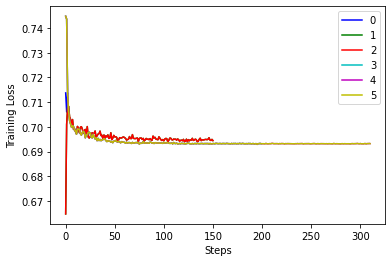

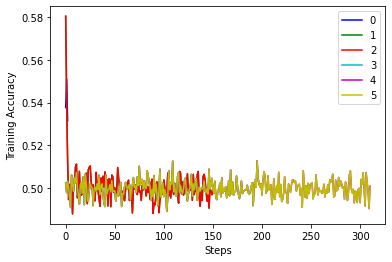

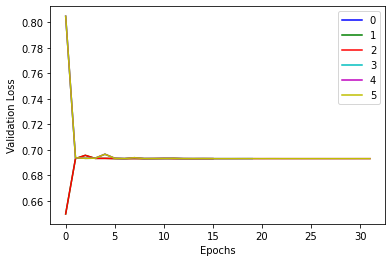

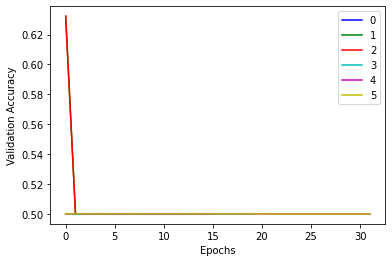

In [9]:
# Code to generate Plots from File
import matplotlib.pyplot as plt

file_paths = os.listdir('./results/')
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

file_paths_train = [file_name for file_name in file_paths if 'train' in file_name]
file_paths_validation = [file_name for file_name in file_paths if 'validation' in file_name]

# Train Loss Accuracy Load Data
train_losses = []
train_accuracies = []
for file_index in range(min(len(file_paths_train), len(colors))):
  train_loss = []
  train_accuracy = []
  file_name = file_paths_train[file_index]
  f = open('./results/{}'.format(file_name))
  lines = f.readlines()
  for line in lines:
    step, current_loss, current_accuracy = line.split(' ')
    train_loss.append(float(current_loss))
    train_accuracy.append(float(current_accuracy))
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  
# Train Loss Plot Data
for idx, train_loss in enumerate(train_losses):
  plt.plot(train_loss, colors[idx], label=idx)

plt.xlabel('Steps')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

# Train Accuracy Plot Data
for idx, train_accuracy in enumerate(train_accuracies):
  plt.plot(train_accuracy, colors[idx], label=idx)

plt.xlabel('Steps')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

# Train Loss Accuracy Load Data
val_losses = []
val_accuracies = []
for file_index in range(min(len(file_paths_validation), len(colors))):
  val_loss = []
  val_accuracy = []
  file_name = file_paths_validation[file_index]
  f = open('./results/{}'.format(file_name))
  lines = f.readlines()
  for line in lines:
    step, current_loss, current_accuracy = line.split(' ')
    val_loss.append(float(current_loss))
    val_accuracy.append(float(current_accuracy))
  val_losses.append(val_loss)
  val_accuracies.append(val_accuracy)
  
# Validation Loss Plot Data
for idx, val_loss in enumerate(val_losses):
  plt.plot(val_loss, colors[idx], label=idx)

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Validation Accuracy Plot Data
for idx, val_accuracy in enumerate(val_accuracies):
  plt.plot(val_accuracy, colors[idx], label=idx)

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Check How Many Duplicated Sentences we have

In [10]:
positive_data = []
with open(DATASET_FILE_TRAIN_POS, "r") as f:
  for x in f:
    positive_data.append(x)

negative_data = []
with open(DATASET_FILE_TRAIN_NEG, "r") as f:
  for x in f:
    negative_data.append(x)

print(len(positive_data))
positive_data = list(dict.fromkeys(positive_data))
print(len(positive_data))

print(len(negative_data))
negative_data = list(dict.fromkeys(negative_data))
print(len(negative_data))

1250000
1127644
1250000
1142838


## Preprocess test-set

In [11]:
test_data = []
with open(DATASET_FILE_TEST, "r") as f:
  for x in f:
    test_data.append(x)

encoded_test_data = []
for x in test_data:
  result, _ = pre_process_positive(tf.convert_to_tensor(x), 128)
  encoded_test_data.append(tf.reshape(tf.convert_to_tensor(result), (1,128)))
encoded_test_ds = tf.data.Dataset.from_tensor_slices(encoded_test_data)

## Predict test set

In [12]:
results = model.predict(encoded_test_ds)
labels = np.argmax(results, axis=1)

## Postprocessing

In [13]:
labels = [1 if x == 1 else -1 for x in labels]

#reverse labels
# labels = [-1 if x == 1 else 1 for x in labels]
#un-reverse labels
# labels = [1 if x == -1 else -1 for x in labels]

In [14]:
df = pd.DataFrame({'Id': np.arange(1,10001),
                  'Prediction': labels
                   })
df.to_csv(MODEL+identifier+'.csv', index=False)